In [1]:
## Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd

In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

Welcome to JupyROOT 6.16/00


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps
import array

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

In [4]:
import os, datetime

In [5]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")

    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

# Analysis

In [7]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
era = "2017"

if selection == "mumug" or selection == "elelg":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = 'V4_phID_isConv'
        #SampleSet = 'V4_phID_isConv_MINUIT'
        SampleSet = 'V6_lPhoton'
        #SampleSet = 'V6_Accept'
        
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt','genPhotonEta','genPhotonPhi',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets',#'nTaus','nBJets',
            'passElectronVeto',
            ]
elif selection == "ee":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'    
    
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 
            #'eventWeight','puWeight',
            'genWeight','triggerWeight','photonIDWeight',
            #'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneCharge',
            #'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoCharge',
            #'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneEta',
            #'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            #'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            #'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            #'photonOneScEtaWidth','photonOneScPhiWidth',
            #'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            #'genPhotonPt',
            #'vetoDY','genIsoPass',
            #'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            #'nMuons','nElectrons','nTaus','nPhotons','nJets','nBJets',
            #'ProbeIDPass','ProbeISOPass','ProbeWorstPass','ProbeSigPass','ProbeIsConv',
            ]
path    = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/Reduced"

figpath = dirStructure(figpath)


Help    = Helper(era)

Help.SetPath(path)
Help.figpath = figpath

Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)

Cut = Cuts(path = Help.path)

Directory 202062/ already exist
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZG/figs/2017/rereco/mumug/202062/nJets

TypeError: 'Plotter' object is not callable

# High Level Functions

In [8]:
def Single_Ploting(Plotter,
                   data,
                   stacked,
                   log,
                   weightCorrection = True,
                   Blind            = True, 
                   Plotting         = True,
                   StatInclude      = False,
                  ):
    #################################################################
    #var = ['nPV','nJets','nBJets','nMuons','nPhotons','met']
    #var = ['nJets','nBJets','nMuons','nPhotons','met']
    var = ['nJets','nMuons','nPhotons','met']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot(
                    data,
                    v,
                    part             = '',
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude,
                    )
        
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonOne_EE','leptonOne_EB',
            'leptonTwo','leptonTwo_EE','leptonTwo_EB',
            'photonOne','photonOne_EE','photonOne_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'llg','llg_EE','llg_EB',
           ]
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )   
            
    #################################################################
    var = ['DPhi','DEta','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB',
            'l2Photon','l2Photon_EE','l2Photon_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB',
            ]    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )            
    #################################################################            
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )              
    #################################################################            
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
            
    #################################################################            
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
    #################################################################            
    var = ['E2x2','E5x5','ScEtaWidth','ScPhiWidth','ScRawE','ScBrem','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )                    

In [9]:
def Multi_Ploting(Plotter,
                  data,
                  stacked,
                  log,
                  density          = False,
                  customRange      = False,
                  weightCorrection = True,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                 ):
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonTwo','photonOne_EE','dilepton','llg','photonOne_EB']

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [4,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )

# CSV files

In [10]:
def CSV_Files(figpath,Print=False):
    part = ['leptonOne','leptonTwo','dilepton','llg']
    var = ['Pt','Eta','Phi']#,'E']
    VAR = [p+v for p in part for v in var]
    VAR += ['dileptonM','llgM']


    var = ['Pt','Eta','Phi']#,'E']
    VAR += ["photonOne"+v for v in var]
    VAR += ["photonOneR9","photonOneMVA","passElectronVeto","photonOneSieie","photonOneHoverE","photonOneIneu","photonOneIch","photonOneIph"]


    part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
    var = ['DEta','DPhi','DR']
    VAR += [p+v for p in part for v in var]

    var2 = ['runNumber','evtNumber','lumiSection','genWeight','eventWeight']+VAR


    for d in data:
        print("---"+d.name)
        df = pd.DataFrame( {v:d.GetWithCuts(v) for v in var2}  )
        df.to_csv(figpath+d.name+".csv")
    if Print:
        print(" Generated individual DataFrames in" + figpath + " for the variables")
        for v in var2:
            print("---- "+v)

# START PLOTING

In [11]:
def ReadFromRegion(Plotter,path, Region):
    Names =['WJets','WWTo2L2Nu','TTTo2L2Nu','DYJets','ZGToLLG', 'DoubleMuon_2017']
    reduced = []
    for name in Names:
        print('----- Reading '+name+' in Region ' +Region+ '--------')
        filename = path+'/'+name+'_'+Region.replace(" ","")+'.csv'
        print('-- '+filename)
        
        reduced.append(pd.read_csv(filename))
    isData = [True if name == 'DoubleMuon_'+era else False for name in Names]
    data = [Data(df = reduced[i],nameFile = Names[i],data = isData[i], Print=False)  for i in range(len(Names))]

    data, legend, colors, isData = Plotter.Help.SetDataOpt(data,selection = selection,exclude = [''])
    Plotter.SetPlotOpt(legend=legend,colors = colors)

    return data,legend,colors,isData

In [12]:
################################
#stacked = False
stacked = True

Blind  = False
#Blind  = True

Plotting = False
#Plotting = True

LOG = 'both'
#log = False
log = True

weightCorrection = False


#phType = 'ISR'
#phType = 'FSR'
phType = ''

Region = 'Sig'
#Region = 'Inv Sig'
#Region = 'Sideband'
#Region = 'Compare'
#Region = 'A'
#Region = ''

Charge = 'oposite'
#Charge = 'same'

#customRange = True
customRange = False

MVA = False
#MVA = True

#vetoDY = False
vetoDY = True

Print = False
#Print = True

#StatInclude = False
StatInclude = True

###############################
if stacked:
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    histtype  = 'step'
    density   = True
    linewidth = 1.7
###############################    

In [13]:
data = {}
Prompt_nonPrompt = False
#Prompt_nonPrompt = True

All = False
#All = True


#Validation = False
Validation = True

if All:
    Region = ''
    data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
else:
    if Prompt_nonPrompt:
        Region = 'SigIPFS'
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

        Region = 'SignoIPFS'
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
    else:    
        
        #Region = 'Sig'
        #data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

        #Region = 'Inv Sig'
        #data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)


        if Validation:
            A = 'Ap'
            B = 'Bp'
            C = 'Cp'
            D = 'Dp'
        else:
            A = 'A'
            B = 'B'
            C = 'C'
            D = 'D'
            
        for region in [A,B,C,D]:
            data[region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,region)
        
        #Region = A
        Region = 'AB'
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
        
        Region = 'CD'
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)


----- Reading WJets in Region Ap--------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_Ap.csv


FileNotFoundError: [Errno 2] File b'/home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_Ap.csv' does not exist: b'/home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_Ap.csv'

In [14]:
for region in data.keys():
    for d in data[region]:
        if "DoubleMuon" in d.name or "DoubleEG" in d.name:
            d.name = "Data"
        elif "WW" in d.name or "ZZ" in d.name or "WZ" in d.name:
            d.name = "V V"
        elif "TT" in d.name:
            d.name = "TT"
        
        
PromptNames = ['WJets', 'V V', 'TT', 'ZGToLLG']    
Names = np.array([d.name for d in data[Region]])



In [15]:

for region in data.keys():
    Ds, legend, colors, dataFlag = Help.SetDataOpt(data[region],selection = selection,exclude = [''])

Plotter.SetPlotOpt(legend=legend,colors = colors)


0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k


In [16]:
def Reset(data):
    for region in data:
        for d in data[region]:
            d.ResetCuts()

In [17]:
for region in data.keys():
    for i in range(len(data[region])):
        data[region][i].name = Names[i]
        #print(data[region][i].name)
        #print(data[region][i].TotalEventBin)


# Prompt | non-prompt separate plot

In [17]:
PromptData = data['SigIPFS'][:-1]
NonPromptData = data['SignoIPFS'][0]
for d in data['SignoIPFS'][1:-1]:
    #if d.name != 'DYJets':
     NonPromptData += d
NonPromptData.name = 'non-Prompt'

PromptData.append(NonPromptData)
PromptData.append(data['SigIPFS'][-1])

KeyError: 'SigIPFS'

In [ ]:
colors = Plotter.colors
colors = colors[:-1]
colors.append('gainsboro')
colors.append('k')

legend = [d.name for d in PromptData]
Plotter.SetPlotOpt(
                   colors,
                   legend,
                  )


In [ ]:
Ds = data[''][-3]
print('FHPS',np.sum(D.df.genPhotonFHPFS)/len(D.df.genPhotonFHPFS))
print('IPFS',np.sum(D.df.genPhotonIPFS)/len(D.df.genPhotonIPFS))
IPFH = np.sum(np.logical_and(D.df.genPhotonFHPFS,
                              D.df.genPhotonIPFS))
print("Both",IPFH/len(D.df.genPhotonFHPFS))

In [ ]:
part = 'dilepton'
var  = 'M'
Var = ['M','Pt']
ph = ''

#part = 'photonOne'
#var  = 'Pt'
#ph = ''

'''
part = 'photonOne'
var  = 'Sieie'
Var = ['Sieie',
       'R9',
       'E2x2',
       'Srr',
        'PreShowerE',
       'Sieip',
        #'Eta',
        'Phi',
       'HoverE',
       'Ich',
       'ScEtaWidth',
       'ScPhiWidth',
       'ScRawE',
      ]
ph = ''
'''

#Ds = PromptData
Ds = data['']

for EBEE in ['EB','EE']:
    Cut.PhaseSpace(
                    Ds,
                    phType = phType,
                    Charge = Charge,
                    Region = [EBEE,"A"],
                    Print  = False,
                    MVA    = MVA,
                    vetoDY = vetoDY,
                  ) 
    for log in [False,True]:
        for v in Var:
            Plotter.Plot(Ds,
                         part             = part,
                         var              = v,
                         signalInclude    = True,
                         log              = log,
                         Blind            = Blind,
                         weightCorrection = weightCorrection,
                         StatInclude      = StatInclude,
                         CustomeRangeBins = [],
                         #index            = phType+'_'+region,
                         index            = 'Prompt_NonPrompt_'+EBEE
                        );
        '''
        Plotter.Plot(PromptData,
                         part             = '',
                         var              = 'Rho',
                         signalInclude    = True,
                         log              = log,
                         Blind            = Blind,
                         weightCorrection = weightCorrection,
                         CustomeRangeBins = [],
                         #index            = phType+'_'+region,
                         index            = 'Prompt_NonPrompt'
                        );
        '''

In [ ]:
#part = 'dilepton'
#var  = 'M'
#ph = ''

#part = 'photonOne'
#var  = 'Pt'
#ph = ''

part = 'photonOne'
var  = 'Sieie'
ph = ''


Cut.PhaseSpace(
                PromptData,
                phType = phType,
                Charge = Charge,
                Region = ['EE'],
                Print  = False,
                MVA    = MVA,
                vetoDY = vetoDY,
              ) 

CustomeRangeBins = {
                    'ranges':[0.0001,0.06],
                    'bins': 30,
                    }
Plotter.Plot(PromptData,
             part             = part,
             var              = var,
             signalInclude    = True,
             log              = log,
             Blind            = Blind,
             weightCorrection = weightCorrection,
             CustomeRangeBins = CustomeRangeBins,
             #index            = phType+'_'+region,
             index            = 'Prompt_NonPrompt'
            );

##########################################
Cut.PhaseSpace(
                PromptData,
                phType = phType,
                Charge = Charge,
                Region = ['EB'],
                Print  = False,
                MVA    = MVA,
                vetoDY = vetoDY,
              ) 

CustomeRangeBins = {
                    'ranges':[0.0001,0.02],
                    'bins': 30,
                    }
Plotter.Plot(PromptData,
             part             = part,
             var              = var,
             signalInclude    = True,
             log              = log,
             Blind            = Blind,
             weightCorrection = weightCorrection,
             CustomeRangeBins = CustomeRangeBins,
             #index            = phType+'_'+region,
             index            = 'Prompt_NonPrompt'
            );

# Normal Plot

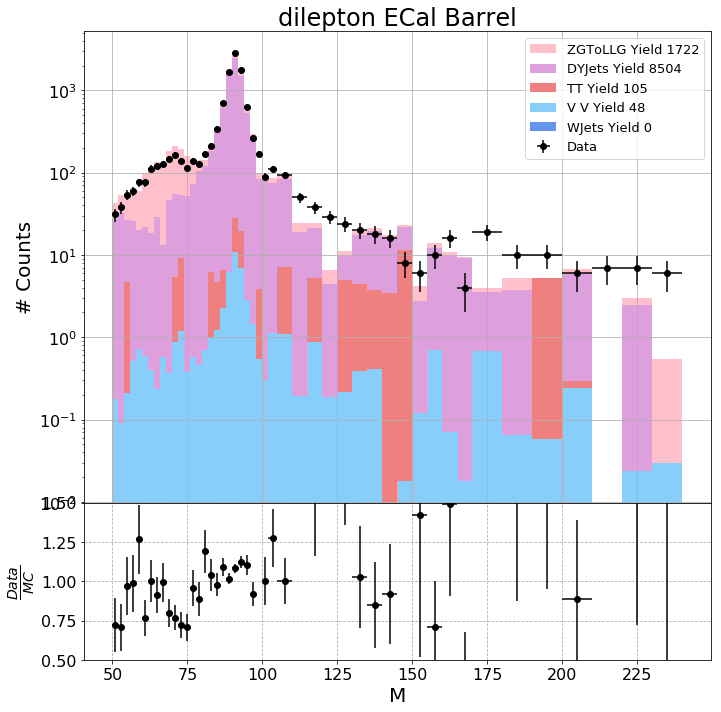

Ap WJets [0, 1.4442]
Ap V V [0, 1.4442]
Ap TT [0, 1.4442]
Ap DYJets [0, 1.4442]
Ap ZGToLLG [0, 1.4442]
Ap Data [0, 1.4442]


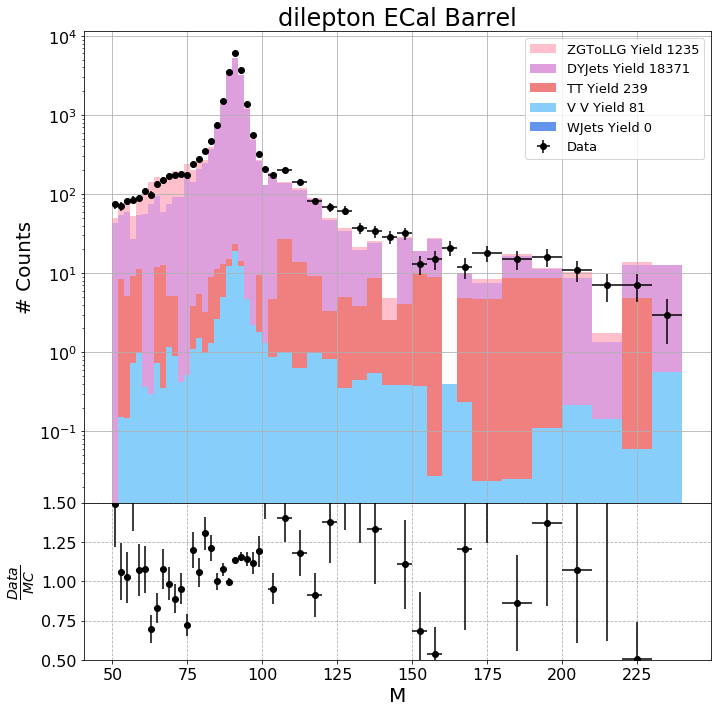

Bp WJets [0, 1.4442]
Bp V V [0, 1.4442]
Bp TT [0, 1.4442]
Bp DYJets [0, 1.4442]
Bp ZGToLLG [0, 1.4442]
Bp Data [0, 1.4442]


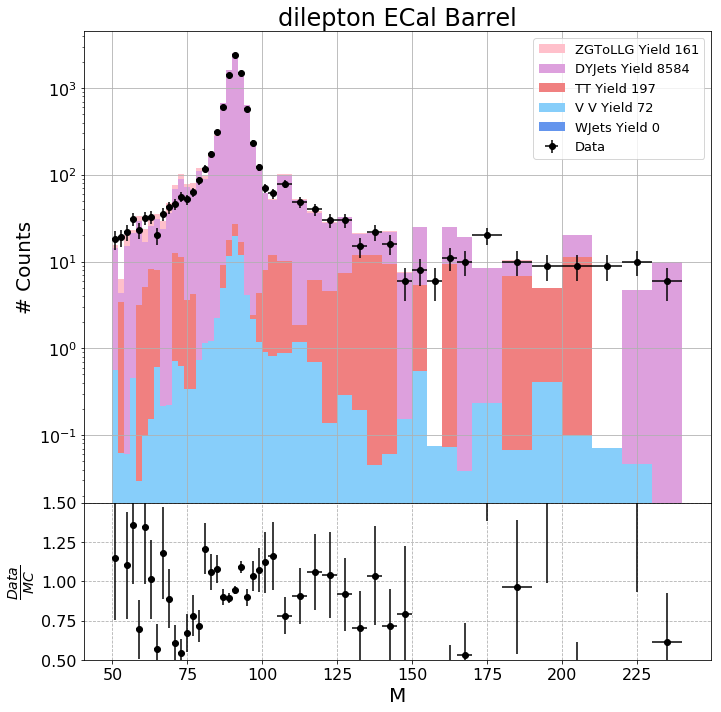

Cp WJets [0, 1.4442]
Cp V V [0, 1.4442]
Cp TT [0, 1.4442]
Cp DYJets [0, 1.4442]
Cp ZGToLLG [0, 1.4442]
Cp Data [0, 1.4442]


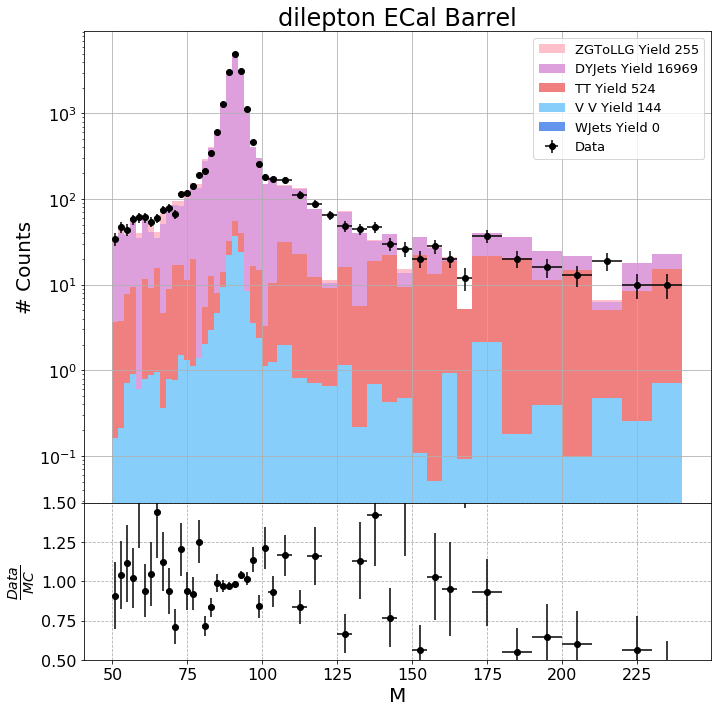

Dp WJets [0, 1.4442]
Dp V V [0, 1.4442]
Dp TT [0, 1.4442]
Dp DYJets [0, 1.4442]
Dp ZGToLLG [0, 1.4442]
Dp Data [0, 1.4442]


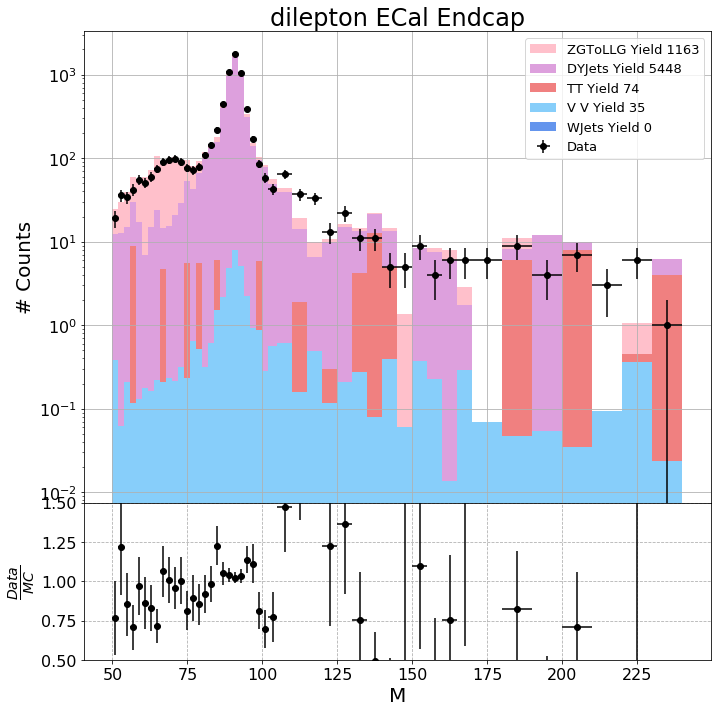

Ap WJets [1.5666, 2.5]
Ap V V [1.5666, 2.5]
Ap TT [1.5666, 2.5]
Ap DYJets [1.5666, 2.5]
Ap ZGToLLG [1.5666, 2.5]
Ap Data [1.5666, 2.5]


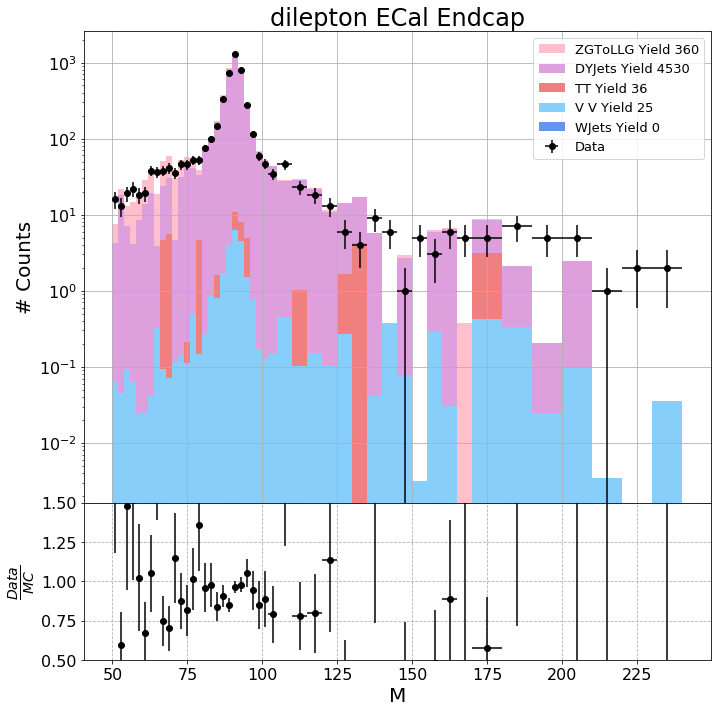

Bp WJets [1.5666, 2.5]
Bp V V [1.5666, 2.5]
Bp TT [1.5666, 2.5]
Bp DYJets [1.5666, 2.5]
Bp ZGToLLG [1.5666, 2.5]
Bp Data [1.5666, 2.5]


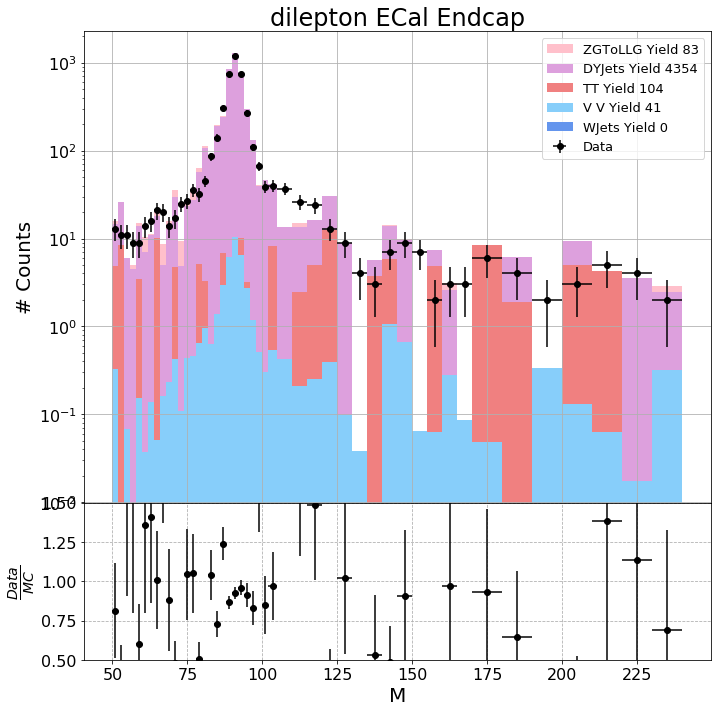

Cp WJets [1.5666, 2.5]
Cp V V [1.5666, 2.5]
Cp TT [1.5666, 2.5]
Cp DYJets [1.5666, 2.5]
Cp ZGToLLG [1.5666, 2.5]
Cp Data [1.5666, 2.5]


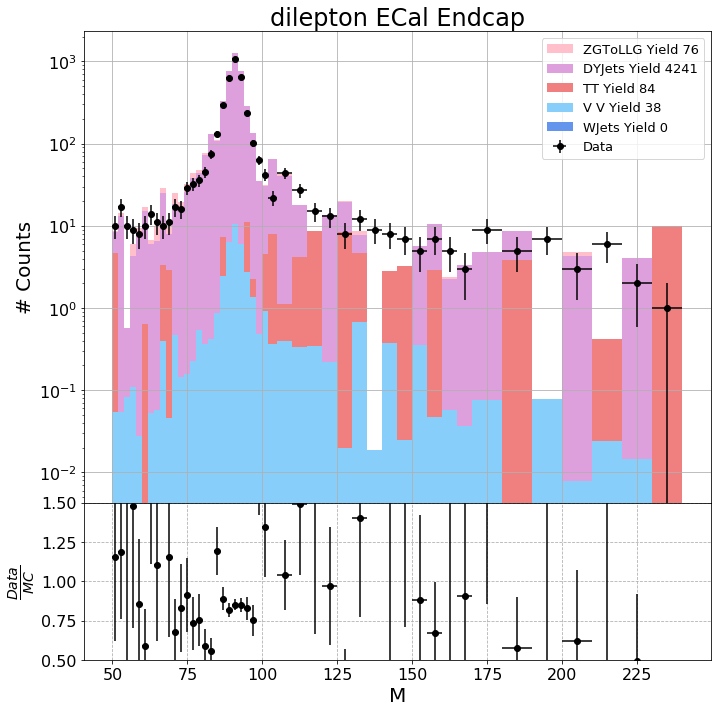

Dp WJets [1.5666, 2.5]
Dp V V [1.5666, 2.5]
Dp TT [1.5666, 2.5]
Dp DYJets [1.5666, 2.5]
Dp ZGToLLG [1.5666, 2.5]
Dp Data [1.5666, 2.5]


In [34]:
#part = 'photonOne'
#part = 'leptonOne'
#part = 'leptonTwo'
#var = 'Pt'
#ph = ''

part = 'dilepton'
#part = 'llg'
var = 'M'
ph = ''

#REGIONS = ['Ap','Bp','Cp','Dp']
#REGIONS =  ['A','B','C','D','AB']
REGIONS = [A,B,C,D]
#REGIONS = ['CD']


phRange = ['EB','EE']
#phRange = ['EB']
#phRange = ['']

#part = 'photonOne'
#var = 'Ich'
#ph = ''

#part = '_EE'
#var = 'ShowerShapeMVA'
#ph = ''


#weightCorrection = True
weightCorrection = False

CustomeRangeBins = {}

h = {}
for r in REGIONS:
    h[r] = {}
    
    names = [d.name for d in data[region]]
    for nm,j in zip(names,range(len(names))):
        h[r][nm] = {}
        for phType in phRange:
            if 'EE' in phType:
                etai = '[1.5666, 2.5]'
            else:
                etai = '[0, 1.4442]'
                
            h[r][nm][etai] = {}
        
for phType in phRange:
    #Cutting = ['']
    #Cutting = ['IPFS',phType]
    Cutting = [phType]
    PART = part+"_"+phType
    #ph = phType
    
    
    for region  in REGIONS:
        #h[region] = {}

        names = [d.name for d in data[region]]

        Plotter.SetPlotOpt(colors = color,
                           legend = names,
                          )

        Cut.PhaseSpace(
                        data[region],
                        phType = '',#phType,
                        Charge = Charge,
                        Region = Cutting,
                        Print  = False,
                        MVA    = MVA,
                        vetoDY = vetoDY,
                      ) 
        
        if var == 'Ich':
            if region == A or region == B:
                CustomeRangeBins = {}
            else:
                CustomeRangeBins = {'ranges':[2,15],
                                    'bins':30,
                                   }


        Plotter.Plot(data[region],
                     part             = PART,
                     var              = var,
                     signalInclude    = True,
                     log              = log,
                     #log              = False,
                     Blind            = Blind,
                     weightCorrection = weightCorrection,
                     CustomeRangeBins = CustomeRangeBins,
                     index            = phType+'_'+region,
                    );

        ########################
        for nm,j in zip(names,range(len(names))):
            part1, var1, ph1 = Plotter.NamingFormat(PART,var)
            if 'EE' in phType:
                etai = '[1.5666, 2.5]'
            else:
                etai = '[0, 1.4442]'
            print(region,nm,etai)
            h[region][nm][etai],Bins = Help.FindRegionInSideband_SingleEta(data[region][j],
                                                                           part = part1,var = var1, ph = ph1,
                                                                           Blind    = Blind,
                                                                           Plotting = Plotting,
                                                                           EtaEBEERegion = True,
                                                                          )
            


In [54]:
for R in h:
    for dats in h[R]:
        for etaS in h[R][dats]:
            for bins in h[R][dats][etaS]:
                print(np.sum(h[R][dats][etaS][bins][0]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.17569489235344496
0.09065573604429464
0.20920446814259114
0.517615823072436
0.7233168010267705
0.5833353773379383
0.4020040357775688
0.2370018108657514
0.5811663373111942
0.3718992209135644
0.885449395204744
1.1878717785763748
0.3800212760620672
0.5749225358985119
0.4581367879688334
0.697697596938038
0.9757560270845833
1.2359982017740894
2.23792191347119
6.205736073372927
10.958145469091804
6.85869950481271
2.806755183787438
1.4522644098863213
0.5499939762398539
0.2991885017517171
1.1274729782884052
1.0973160403476323
0.1956314067111325
0.8821526495734839
0.18567222132595268
0.21489537409073795
0.3875009653987726
0

# Getting the non-prompt Bkg

In [35]:
def GetABDCParam(BkgYield, SignalYield, DataYield,A='A',B='B',C='C',D='D', ABCD_STD = True,Validation=False ):
    
    if ABCD_STD:
        if BkgYield[D] != 0:
            frac = BkgYield[C]/BkgYield[D]
        else:
            frac = 1
            
        if BkgYield[D] == 0:
            BD = 1
        else:
            BD = BkgYield[D]
            
        if BkgYield[C] == 0:
            BC = 1
        else:
            BC = BkgYield[C]
        
        fracErr = frac*np.sqrt(1/BC+1/BD)

        Bkg = frac*BkgYield[B]
    else:
        eph = SignalYield[A]/(SignalYield[A] + SignalYield[B])
        ej  = BkgYield[C]/(BkgYield[C]+ BkgYield[D])
        
        frac,fracErr = 0,0
        
        Bkg = ((1-eph)*DataYield[A] - (1-ej)*DataYield[B])/((1-eph)-(1-ej)*(1-ej))
    
    Bkg = np.abs(Bkg)
        
    return frac,fracErr,Bkg

In [36]:
def GetBkgABCD(h,Names,A='A',B='B',C='C',D='D',ABCD_STD=True,Validation=False):
    NonPrompt,Prompt = {},{}

    frac,fracErr = {},{}

    for etaS in h[A]['ZGToLLG'].keys():
        print(etaS)

        NonPrompt[etaS] = []
        Prompt[etaS]    = []
        frac[etaS]      = []
        fracErr[etaS]   = []
        
        for varS in h[A]['ZGToLLG'][etaS].keys():        
            BkgYield    = {}
            PromptYield = {}
            DataYield   = {}

            ####################################

            for region in [A,B,C,D]:
                DataYield[region]  = np.sum(h[region]['Data'][etaS][varS][0])
                NMC                 = round(np.sum(h[region]['DYJets'][etaS][varS][0]))
                PromptYield[region] = 0

                for name in Names:
                    PromptYield[region] += np.sum(h[region][name][etaS][varS][0])

                    
                if region == A and not Validation:
                    BkgYield[region] = np.sum(h[region]['DYJets'][etaS][varS][0])
                else:
                    BkgYield[region] = DataYield[region] - PromptYield[region]

            ####################################

            f,fe,nonPrompt = GetABDCParam(BkgYield    = BkgYield,
                                          SignalYield = PromptYield, 
                                          DataYield   = DataYield,
                                          A = A, B = B, C = C, D = D,
                                          ABCD_STD    = ABCD_STD,
                                          )
            
            frac[etaS]     .append(f)
            fracErr[etaS]  .append(fe)
            NonPrompt[etaS].append(nonPrompt)
            #Prompt[etaS]   .append(PromptYield)
            Prompt[etaS]   .append(BkgYield)

            ########
            
            #print('d',f,'C ',round(PromptYield['C'],2),' D ',round(PromptYield['D'],2))
            #print()

    return NonPrompt,Prompt, frac,fracErr    

# Plotting with Data Driven method

In [37]:
def GenerateBkg(part,var,ph,
                Bins,h):
    Signal, Background = {},{}
    SigmaS, SigmaB = {},{}

    for eta in Bins['photonOneEta']: 
        etaS = str(eta)

        Signal[etaS]     = []
        Background[etaS] = []
        SigmaS[etaS] = []
        SigmaB[etaS] = []
        for var1, j in zip(Bins[part+var+ph], range(len(Bins[part+var+ph]))):
            ############
            
            var1S = str(var1)

            region = B
            NN = 0
            for name in PromptNames:
                NN += np.sum(h[region][name][etaS][varS][0])
            SUM[region] = np.sum(h[region]['DoubleMuon_2017'][etaS][varS][0]) - NN

            #NSig = FIT[etaS][var1S][0][0]
            #NBkg = FIT[etaS][var1S][0][1]
            NBkg = np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0])- NSig

            SigmaSig = FIT[etaS][var1S][1][0]
            SigmaBkg = 0#FIT[etaS][var1S][1][0]
            
            ############
            
            Signal[etaS]    .append(NSig)
            Background[etaS].append(NBkg)

            SigmaS[etaS].append(SigmaSig)
            SigmaB[etaS].append(SigmaBkg)


    return Signal, Background, SigmaS, SigmaB 

In [38]:
def HistogramingVariables(
                         data,
                         part,var,ph,
                         Bins, 
                         Signal, Background,
                         DataDriven       = False,
                         ZGDataDriven     = False,
                         weightCorrection = False,
                         Plotting         = False,
                         Blind            = False,
                         ):    
    VAR,X = {},{}
    ranges,B = Help.GET_RangeBins(part,var,ph, Blind=Blind,Plotting=Plotting)

    ####################
    
    InitialCuts = {}
    for d in data:
        InitialCuts[d.name] = d.cuts
        
    ############################
    
    #for eta in Bins['photonOneEta'],:
    for eta,phType in zip(Bins['photonOneEta'],['EB','EE']):
        etaS = str(eta)
        
        VAR[etaS] = []
        X[etaS]   = []
        
        Cut.PhaseSpace( 
                        data,
                        phType   = '',
                        Charge   = 'oposite',
                        Region   = ['IPFS',phType],
                        MVA      = False,
                        vetoDY   = True,
                        ichRange = None,
                        Print    = False,
                      )

        for d in data:               
            HH = Plotter.BinnedHist(data = d, 
                                    var = var, part = part,
                                    weightCorrection = weightCorrection,
                                    Plotting  = Plotting,
                                    Blind     = Blind,
                                   )
            VAR[etaS].append(HH[0])
            X[etaS].append(HH[1])
         
        xc = []
        for x in X[etaS]:
            xc.append((x[1:]+x[:-1])/2)

        X[etaS]   = np.array(X[etaS])
        VAR[etaS] = np.array(VAR[etaS])
        
        if DataDriven: 
            Names[-3] = 'non-prompt'
            VAR[etaS][-3] = np.array(Background[etaS])            
            if ZGDataDriven:
                VAR[etaS][Names=='ZGToLLG'] = np.array(Signal[etaS])
        else:
            Names[-3] = 'DYJets'


        ''' 
        if DataDriven:
            VAR[etaS][Names=='DYJets'] = np.array(Background[etaS])
            if ZGDataDriven:
                VAR[etaS][Names=='ZGToLLG'] = np.array(Signal[etaS])
        ''';
                   
    for d in data:
        d.ResetCuts(InitialCuts[d.name])
    
    return VAR,X,ranges,Names

[0, 1.4442]
[1.5666, 2.5]


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


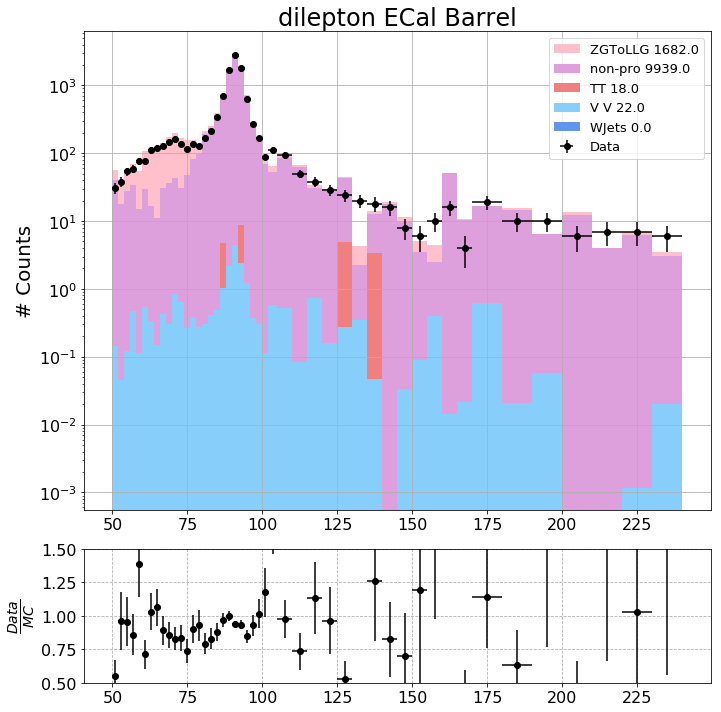

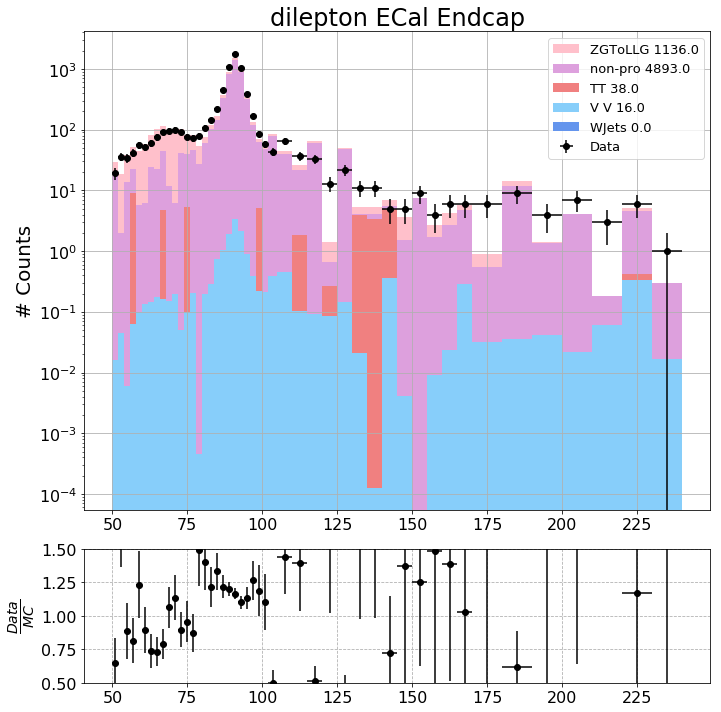

In [39]:
##################

Reset(data)

#EtaEBEERegion = True
EtaEBEERegion = False
if EtaEBEERegion:
    Blind = EtaEBEERegion
else:
    Blind = False

##########################
Sig = None

DataDriven = True
#DataDriven = False

ABCD_STD = True
#ABCD_STD = False

#ZGDataDriven = True
ZGDataDriven = False

#weightCorrection = True
weightCorrection = False

##########################
if ABCD_STD:
    ABCD = A
else:
    ABCD = 'AB'

Cutting = 'IPFS'
###########################


Cut.PhaseSpace(
            data[ABCD],
            phType = phType,
            Charge = Charge,
            Region = Cutting,
            Print  = False,
            MVA    = MVA,
            vetoDY = vetoDY,
          )

#data[ABCD][-3].ResetCuts()
##########################

NonPrompt,Prompt, fracABCD,fracABCDErr = GetBkgABCD(h,PromptNames,A=A,B=B,C=C,D=D,
                                                    ABCD_STD=ABCD_STD,Validation=Validation)
Background = {}
Background = NonPrompt

if DataDriven:
    if ABCD_STD:
        index = 'DD_ABCD'
    else:
        index = 'DD_ABCD_AB'
else:
    index = 'MC'

VAR,X,ranges,Names = HistogramingVariables(data = data[ABCD],
                                          part = part,var = var,ph = ph,
                                          Bins = Bins, 
                                          Signal = Sig, Background = Background,
                                          DataDriven       = DataDriven,
                                          ZGDataDriven     = ZGDataDriven,
                                          weightCorrection = weightCorrection,
                                          Plotting         = Plotting,
                                          Blind            = Blind,
                                        ) 

for eta,phType in zip(Bins['photonOneEta'],['EB','EE']): 
    etaS = str(eta)

    Plotter.Plot_Bin(
                 VAR    = VAR[etaS], wei    =  VAR[etaS],
                 label  =     Names, colors =      color,
                 ranges =    ranges, bins   = X[etaS][0],
                 var              = var,
                 part             = part+'_'+phType,
                 signalInclude    = True,
                 stacked          = True,
                 density          = False,
                 log              = log,
                 Plotting         = Plotting,
                 Blind            = Blind,
                 #StatInclude      = StatInclude,
                 StatInclude      = False,
                 index            = phType +'_'+ index,
                );
                

In [40]:
#print(len(Prompt['[0, 1.4442]']),
#    len(NonPrompt['[0, 1.4442]'])
#     )

#print()
#len(h['A']['DYJets']['[0, 1.4442]'])
#len(Background['[0, 1.4442]'])

In [41]:
#Bins

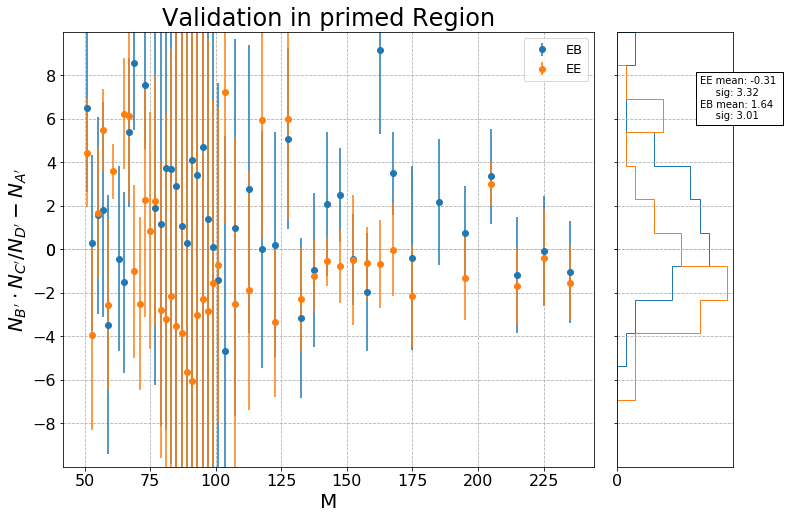

In [42]:
# In the validation flag 
# Promp[] = Data- Prompt 

# Background = Estimate from Nc/Nd*Nb

fig = plt.figure(figsize=(12,8))
plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=4)
ax = plt.gca()
plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1,sharey=ax)
ax1 = plt.gca()


std = {}
mean = {}
for etaS in Prompt:
    if etaS == '[0, 1.4442]':
        etaL = 'EB'
    elif etaS == '[1.5666, 2.5]':
        etaL = 'EE'
    
    PRegion,Err = [],[]
    for i in np.arange(len(Prompt[etaS])):
        Bck = Background[etaS][i]
        Actual_Yield = Prompt[etaS][i][A]
        
        if Actual_Yield == 0:
            Validation_Region = (Bck - Actual_Yield)
            err = 1
        elif Actual_Yield < 0:
            Actual_Yield = np.abs(Actual_Yield)
            Validation_Region = (Bck - Actual_Yield)/np.sqrt(Actual_Yield)
            err = np.sqrt(Actual_Yield)
        else:
            Validation_Region = (Bck - Actual_Yield)/np.sqrt(Actual_Yield)
            err = np.sqrt(Actual_Yield)
        
        PRegion.append(Validation_Region)
        Err.append(err)
    PRegion =np.array(PRegion)
    
    
    ax.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),PRegion,
                 yerr      = Err,
                 linestyle = '',
                 marker    = 'o',
                 label     = etaL,
                )
    ax.set_title('Validation in primed Region')
    ax.set_xlabel(var)
    ax.set_ylabel(r'$N_{B^\prime} \cdot N_{C^\prime}/N_{D^\prime}  - N_{A^\prime}$')
    #std = np.std(PRegion)
    #mean = np.mean(PRegion)
    #ax.set_ylim([mean-std,mean+std])
    
    ax.set_ylim([-10,10])
    ylim = ax.get_ylim()
    
    
    std[etaL]  = round(np.std(PRegion[np.abs(PRegion)< 10]),2)
    mean[etaL] = round(np.mean(PRegion[np.abs(PRegion)< 10]),2)
    ax1.hist(PRegion,
             bins        = 13,
             range       = ylim,
             histtype    = 'step',
             orientation ='horizontal',
             
            )
    #ax1.yaxis.set_ticklabels([])
    ax1.label_outer()
    
    
    
    
    ######## Formating ################
    
    step = int((ylim[1]-ylim[0])/(0.5*(ylim[1]-ylim[0])))
    posyTick = np.arange(0,ylim[1] ,step=step)
    negyTick = np.arange(0,ylim[0] ,step=-step)[::-1]
    
    yticks = [tick  for tick in negyTick]
    for tick in posyTick:
        yticks.append(tick)
    ax.yaxis.set_ticks(yticks)
    
    xlim = ax1.get_xlim()
    step = int((xlim[1]-xlim[0])/(0.05*(xlim[1]-xlim[0])))
    posxTick = np.arange(0,xlim[1] ,step=step)
    negxTick = np.arange(0,xlim[0] ,step=-step)[::-1]
    xticks = [tick  for tick in negxTick]
    for tick in posxTick:
        xticks.append(tick)
    ax1.xaxis.set_ticks(xticks)
    
    
ax1.text(9,6,
         'EE'+' mean: '+str(mean['EE'])+' \n     sig: '+str(std['EE']) +'\n'+
         'EB'+' mean: '+str(mean['EB'])+' \n     sig: '+str(std['EB']),
         fontsize = 10,
         bbox= {'fc':'w'},
        )
ax.legend()
ax.grid(linestyle='--')
ax1.grid(linestyle='--')
plt.show()

fig.savefig(figpath+part+var+'ABCD_validation_prime.png')

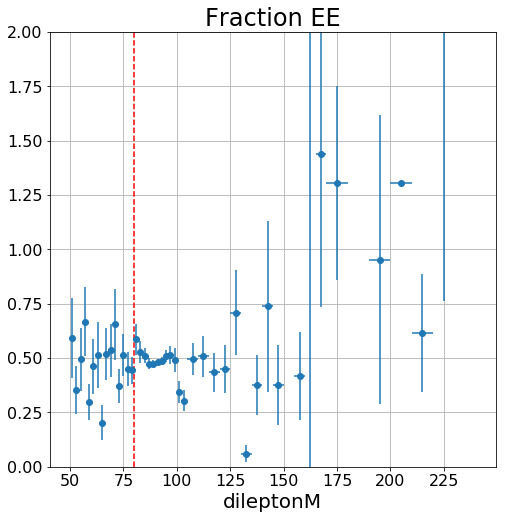

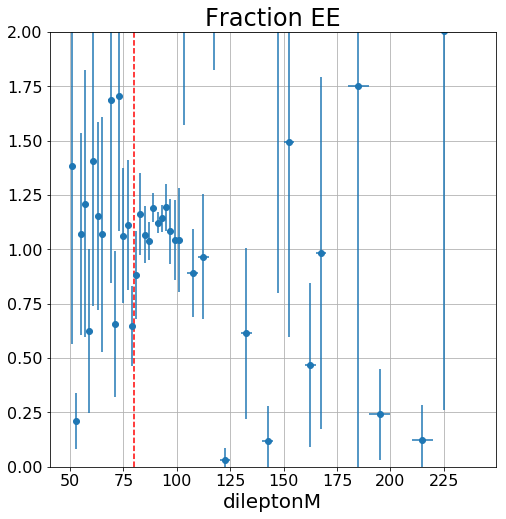

In [43]:

frac    = fracABCD
fracErr = fracABCDErr

for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4666]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    FRAC = []
    FRACErr = []

    fig = plt.figure(figsize=(8,8))
    for varS,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        FRAC.append(frac[etaS][i])
        FRACErr.append(fracErr[etaS][i])
        
    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 FRAC,
                 xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
                 yerr      = FRACErr,
                 marker    = 'o',
                 linestyle = '',
                )
    ax = plt.gca()
    ax.set_ylim([0,2])
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Fraction '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    
    
    fig.savefig(figpath+part+var+ph+'_Fraction_'+phType+'.png')

In [44]:
Count = {}
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    Count[etaS] = {}
    for region in [A,B,C,D]:
        Count[etaS][region] = []
    for prompt in Prompt[etaS]:
        for region in [A,B,C,D]:
            Count[etaS][region].append(prompt[region])

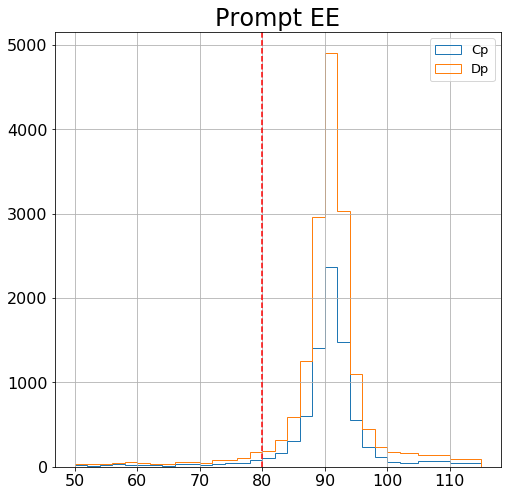

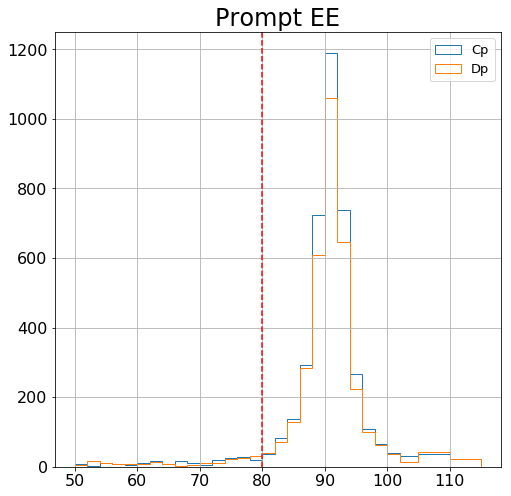

In [45]:
#RList = [A,B,C,D]
#RList = [B,C,D]
RList = [C,D]
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4666]':
        phType = 'EB'
    else:
        phType = 'EE'
    plt.figure(figsize=(8,8))
    bins = np.array(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))
    for region in RList:
        plt.hist(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 bins     = bins[bins<120],
                 weights  = Count[etaS][region],
                 histtype = 'step',
                 label    = region,
                )
    ax = plt.gca()
    #ax.set_yscale('log')
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Prompt '+phType)
    plt.legend()

# Determine Ich frac extrapolation 

# Test cuts

In [70]:
ichLow,ichHigh = 3,10
step = 0.5

In [71]:
Bins = {}

#######################################################
part = 'dilepton'
var = 'M'
ph = ''

#part = 'photonOne'
#var = 'Pt'
#ph = ''

ranges ,bins = Help.GET_RangeBins( part,var,ph,
                                    Blind    = True,
                                    Plotting = True, 
                                    File     = True,
                                    )
bins = Help.BinFormat(Bins=bins,Type='ranges')

Bins[part+var+ph]= bins
########################################################
#Bins['photonOneEta']= [[0, 1.4666],[1.4666, 2.5]]
Bins['photonOneEta']= [[0, 1.4442],[1.5666, 2.5]]

########################################################

Bins['']= ['']

In [72]:
'''
pathFrac = '/home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V4_phID_isConv_MINUIT/'
df = pd.DataFrame(frac)
df.to_json(pathFrac+'frac.json')
''';

In [172]:
def GetABCDBkg_Extrapol(part,var,ph,
                        Bins,Names,
                        ichRange=[3,11.5],step=1,
                        SingleVar = False, varTarget = '[68.0, 70.0]',
                        Print = False,
                       ):
    Reset(data)

    #############################

    frac,fracErr = {},{}
    NonPromptYield  = {}
    PromptYield   = {}

    print('----',part+var+ph,'-----')
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if Print:
            print(etaS)

        frac[etaS]           = {}
        fracErr[etaS]        = {}
        NonPromptYield[etaS] = {}
        PromptYield[etaS]    = {}
        for var1 in Bins[part+var+ph]:     
            varS = str(var1)
            
            if SingleVar:
                if varS != varTarget: continue
            if Print:
                print('----'+varS)

            NonPromptYield[etaS][varS] = {}
            PromptYield[etaS][varS]    = {}
            
            frac[etaS][varS]    = {}
            fracErr[etaS][varS] = {}

            ####################################        

            for ich in np.arange(ichLow,ichHigh,step=step):
                frac[etaS][varS][ich]           = 0
                fracErr[etaS][varS][ich]        = 0
                NonPromptYield[etaS][varS][ich] = {}
                PromptYield[etaS][varS][ich]    = {}

                ####################################

                for region in ['A','B','C','D']:

                    Cutting = ['IPFS','Ich']
                    if region != 'A':
                        Cut.PhaseSpace(
                                    data[region],
                                    phType   = '',
                                    Charge   = True,
                                    Region   = Cutting,
                                    Print    = False,
                                    MVA      = MVA,
                                    vetoDY   = True,
                                    ichRange = [[ich,ich],[ich+1,ich+1]]
                                  )  
                    for nm,j in zip(names,range(len(names))):
                        h[region][nm],Bins = Help.FindRegionInSideband(data[region][j],part = part,var = var, ph = ph)   

                    NData = np.sum(h[region]['Data'][etaS][varS][0])
                    NMC   = round(np.sum(h[region]['DYJets'][etaS][varS][0]))

                    ####################################

                    NonPromptYield[etaS][varS][ich][region] = 0
                    PromptYield [etaS][varS][ich][region]   = 0

                    for name in Names:
                        PromptYield[etaS][varS][ich][region] += np.sum(h[region][name][etaS][varS][0])

                    if region == 'A':
                        NonPromptYield[etaS][varS][ich][region] = np.sum(h[region]['DYJets'][etaS][varS][0])
                    else:
                        NonPromptYield[etaS][varS][ich][region] = NData - PromptYield[etaS][varS][ich][region]

                ####################################
                C = NonPromptYield[etaS][varS][ich]['C']
                D = NonPromptYield[etaS][varS][ich]['D']

                if D == 0:
                    frac[etaS][varS][ich]    = 1
                    fracErr[etaS][varS][ich] = 1
                else:
                    frac[etaS][varS][ich]    = C/D
                    fracErr[etaS][varS][ich] = C/D*np.sqrt(1/C+1/D)/2

    return frac,fracErr,PromptYield,NonPromptYield

In [218]:
def PlotIch(part,var,ph,Bins,
            frac, fracErr,
            ichRange=[3,11.5],step=0.5,
            SingleVar = False, varTarget = '[68.0, 70.0]',
           ):
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if etaS == '[0, 1.4442]':
            phType = 'EB'
        else:
            phType = 'EE'


        for var1 in Bins[part+var+ph]:
            varS = str(var1)
            if SingleVar:
                if varS != varTarget: continue
            
            fig = plt.figure(figsize=(8,8))

            FRAC,FRACErr = [],[]
            ICH = []

            for ich in np.arange(ichLow,ichHigh,step=step):
                ICH.append(ich)
                FRAC.append(frac[etaS][varS][ich])
                FRACErr.append(fracErr[etaS][varS][ich])

            plt.errorbar(ICH,FRAC,
                         xerr     = step/2,
                         yerr     = FRACErr,
                         marker   = 'o',
                        linestyle = '',
                        )

            plt.title('Fraction '+part+var+' '+phType+' '+varS)
            ax = plt.gca()
            ax.set_xlabel('Ich')
            ax.set_ylabel(r'$\frac{N_C}{N_D}$')
            ax.set_xlim([0,ichHigh])
            plt.show()

            fig.savefig(figpath+part+var+ph+'_Fraction'+phType+'_'+varS+'.png')    

In [219]:
def PlotIch_Prompt(part,var,ph,Bins,
                    Yield,
                    ichRange=[3,11.5],step=0.5,
                    SingleVar = False, varTarget = '[68.0, 70.0]',
                    NonPrompt = False,
                   ):
    if NonPrompt:
        PromptLabel = 'NonPrompt'
    else:
        PromptLabel = 'Prompt'
    
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if etaS == '[0, 1.4442]':
            phType = 'EB'
        else:
            phType = 'EE'

        for region in  ['C','D']:
            for var1 in Bins[part+var+ph]:
                varS = str(var1)
                if SingleVar:
                    if varS != varTarget: continue

                

                VAR,VARErr = [],[]
                ICH = []

                for ich in np.arange(ichLow,ichHigh,step=step):
                    ICH.append(ich)
                    VAR.append(Yield[etaS][varS][ich][region])
                    VARErr.append(np.sqrt(Yield[etaS][varS][ich][region]))

                VARErr = np.array(VARErr)
                fig = plt.figure(figsize=(8,8))
                plt.errorbar(ICH,VAR,
                             xerr     = step/2,
                             yerr     = VARErr/2,
                             marker   = 'o',
                            linestyle = '',
                            )
                ax = plt.gca()
                ax.set_xlabel('Ich')
                
                ax.set_ylabel(PromptLabel+' Yield')
                plt.title(region+' '+PromptLabel+' '+part+var+'_'+phType+' '+varS)

                plt.show()
                fig.savefig(figpath+part+var+ph+'_'+region+'_'+PromptLabel+'_'+phType+'_'+varS+'.png')

In [220]:
SingleVar = True
#SingleVar = False

Print     = True
#Print     = False

#part = 'photonOne'
#var = 'Pt'
#ph = ''

part = 'dilepton'
var = 'M'
ph = ''

ichLow = 3
ichHigh = 10
step = 1

if part == 'dilepton' and var == 'M':
    #varTarget = '[68.0, 71.0]'
    varTarget = '[80.0, 83.0]'
    #varTarget = '[137.0, 140.0]'
elif part == 'photonOne' and var == 'Pt':
    varTarget = '[35.0, 45.0]'
    

In [221]:
fracExtrapol,fracExtrapolErr,PromptYield,NonPromptYield = GetABCDBkg_Extrapol(part,var,ph,
                                                                            Bins = Bins,Names = PromptNames,
                                                                            ichRange=[ichLow,ichHigh],step=step,
                                                                            SingleVar = SingleVar, varTarget = varTarget,
                                                                            Print = Print,
                                                                           )

---- dileptonM -----
[0, 1.4442]
----[80.0, 83.0]
[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 14

[0, 1.4442] [50.0, 53.0] 23.537258847854233
[0, 1.4442] [53.0, 56.0] 42.531683028262044
[0, 1.4442] [56.0, 59.0] 26.940727626781545
[0, 1.4442] [59.0, 62.0] 29.985839695417287
[0, 1.4442] [62.0, 65.0] 32.87242524316571
[0, 1.4442] [65.0, 68.0] 45.196451714140196
[0, 1.4442] [68.0, 71.0] 16.114317893234578
[0, 1.4442] [71.0, 74.0] 31.197263808114222
[0, 1.4442] [74.0, 77.0] 23.630970261702025
[0, 1.4442] [77.0, 80.0] 46.68674655877747
[0, 1.4442] [80.0, 83.0] 4.503052741272672
[0, 1.4442] [83.0, 86.0] 22.25600153785808
[0, 1.4442] [86.0, 89.0] 30.66636864024695
[0, 1.4442] [89.0, 92.0] 30.893682657238994
[0, 1.4442] [92.0, 95.0] 39.910307302335525
[0, 1.4442] [95.0, 98.0] 16.303050774223536
[0, 1.4442] [98.0, 101.0] 21.082858925412108
[0, 1.4442] [101.0, 104.0] 17.101999136341576
[0, 1.4442] [104.0, 107.0] 17.831647275928837
[0, 1.4442] [107.0, 110.0] 19.284345796610545
[0, 1.4442] [110.0, 113.0] 10.097290716852926
[0, 1.4442] [113.0, 116.0] 3.7647474757138015
[0, 1.4442] [116.0, 119.0]

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442] [149.0, 152.0] 0.0
[0, 1.4442] [152.0, 155.0] 0.0
[0, 1.4442] [155.0, 158.0] 0.0
[0, 1.4442] [158.0, 161.0] 0.0
[0, 1.4442] [161.0, 164.0] 0.0
[0, 1.4442] [164.0, 167.0] 0.0
[0, 1.4442] [167.0, 170.0] 0.0
[0, 1.4442] [170.0, 173.0] 0.0
[0, 1.4442] [173.0, 176.0] 0.0
[0, 1.4442] [176.0, 179.0] 0.0
[0, 1.4442] [179.0, 182.0] 0.0
[0, 1.4442] [182.0, 185.0] 0.0
[0, 1.4442] [185.0, 188.0] 0.0
[0, 1.4442] [188.0, 191.0] 0.0
[0, 1.4442] [191.0, 194.0] 0.0
[0, 1.4442] [194.0, 197.0] 0.0
[0, 1.4442] [197.0, 200.0] 0.0
[0, 1.4442] [200.0, 203.0] 0.0
[0, 1.4442] [203.0, 206.0] 0.0
[0, 1.4442] [206.0, 209.0] 0.0
[0, 1.4442] [209.0, 212.0] 0.0
[0, 1.4442] [212.0, 215.0] 0.0
[0, 1.4442] [215.0, 218.0] 0.0
[0, 1.4442] [218.0, 221.0] 0.0
[0, 1.4442] [221.0, 224.0] 0.0
[0, 1.4442] [224.0, 227.0] 0.0
[0, 1.4442] [227.0, 230.0] 0.0
[0, 1.4442] [230.0, 233.0] 0.0
[0, 1.4442] [233.0, 236.0] 0.0
[0, 1.4442] [236.0, 239.0] 0.0
[0, 1.4442] [239.0, 242.0] 0.0
[0, 1.44

[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] -0.6805324582317847
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442] [149.0, 152.0] 0.0
[0, 1.4442] [152.0, 155.0] 0.0
[0, 1.4442] [155.0, 158.0] 0.0
[0, 1.4442] [158.0, 161.0] 0.0
[0, 1.4442] [161.0, 164.0] 0.0
[0, 1.4442] [164.0, 167.0] 0.0
[0, 1.4442] [167.0, 170.0] 0.0
[0, 1.4442] [170.0, 173.0] 0.0
[0, 1.4442] [173.0, 176.0] 0.0
[0, 1.4442] [176.0, 179.0] 0.0
[0, 1.4442] [179.0, 182.0] 0.0
[0, 1.4442] [182.0, 185.0] 0.0
[0, 1.4442] [185.0, 188.0] 0.0
[0, 1.4442] [188.0, 191.0] 0.0
[0, 1.4442] [191.0, 194.0] 0.0
[0, 1.4442] [194.0, 197.0] 0.0
[0, 1.4442] [197.0, 200.0] 0.0
[0, 1.4442] [200.0, 203.0] 0.0
[0, 1.4442] [203.0, 206.0] 0.0
[0, 1.4442] [206.0, 209.0] 0.0
[0, 1.4442] [209.0, 212.0] 0.0
[0, 1.4442] [212.0, 215.0] 0.0
[0, 1.4442] [215.0, 218.0] 0.0
[0, 1.4442] [218.0, 221.0] 0.0
[0, 1.4442] [221.0, 224.0] 0.0
[0, 1.4442] [224.0, 227.0] 0.0
[0, 1.4442] [227.0, 230.0] 0.0
[0, 1.4442] [230.0, 233.0] 0.0
[0, 1.4442] [233.0, 236

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [137.0, 140.0] 2.3634557740113045
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.3824301185928454
[0, 1.4442] [146.0, 149.0] 1.8742928266906425
[0, 1.4442] [149.0, 152.0] 0.0
[0, 1.4442] [152.0, 155.0] 0.536227613949493
[0, 1.4442] [155.0, 158.0] 2.4197865836234795
[0, 1.4442] [158.0, 161.0] -2.1951150902434406
[0, 1.4442] [161.0, 164.0] 0.0
[0, 1.4442] [164.0, 167.0] 0.0
[0, 1.4442] [167.0, 170.0] 0.0
[0, 1.4442] [170.0, 173.0] -2.589469117201761
[0, 1.4442] [173.0, 176.0] 2.7465528067558287
[0, 1.4442] [176.0, 179.0] 2.6463650708317727
[0, 1.4442] [179.0, 182.0] 0.0
[0, 1.4442] [182.0, 185.0] 0.0
[0, 1.4442] [185.0, 188.0] 0.0
[0, 1.4442] [188.0, 191.0] -2.8118616514934445
[0, 1.4442] [191.0, 194.0] 0.0
[0, 1.4442] [194.0, 197.0] 0.0
[0, 1.4442] [197.0, 200.0] 3.039240261659128
[0, 1.4442] [200.0, 203.0] 0.0
[0, 1.4442] [203.0, 206.0] 0.0
[0, 1.4442] [206.0, 209.0] 0.0
[0, 1.4442] [209.0, 212.0] 2.0574380785253683
[0, 1.4442] [212.0, 215.0] 0.0
[0, 1.4442] [2

[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [6

[0, 1.4442] [50.0, 53.0] 81.28440780567678
[0, 1.4442] [53.0, 56.0] 92.06455187876831
[0, 1.4442] [56.0, 59.0] 70.36704796607101
[0, 1.4442] [59.0, 62.0] 103.46460470920856
[0, 1.4442] [62.0, 65.0] 108.5089960608457
[0, 1.4442] [65.0, 68.0] 173.59155573255046
[0, 1.4442] [68.0, 71.0] 144.589368245679
[0, 1.4442] [71.0, 74.0] 227.25480039999496
[0, 1.4442] [74.0, 77.0] 218.53713843067405
[0, 1.4442] [77.0, 80.0] 341.0345391355133
[0, 1.4442] [80.0, 83.0] 524.530041110536
[0, 1.4442] [83.0, 86.0] 1285.8113038702159
[0, 1.4442] [86.0, 89.0] 3535.6791734845883
[0, 1.4442] [89.0, 92.0] 10473.361601028855
[0, 1.4442] [92.0, 95.0] 5685.685312263806
[0, 1.4442] [95.0, 98.0] 1368.6816946698443
[0, 1.4442] [98.0, 101.0] 531.9235271294403
[0, 1.4442] [101.0, 104.0] 336.6170956327954
[0, 1.4442] [104.0, 107.0] 146.0584818352328
[0, 1.4442] [107.0, 110.0] 106.1086920539189
[0, 1.4442] [110.0, 113.0] 85.64880632190804
[0, 1.4442] [113.0, 116.0] 58.73275616798574
[0, 1.4442] [116.0, 119.0] 64.9373571

[1.5666, 2.5] [155.0, 158.0] 4.002860552052216
[1.5666, 2.5] [158.0, 161.0] 7.015408030645908
[1.5666, 2.5] [161.0, 164.0] 7.621573555059155
[1.5666, 2.5] [164.0, 167.0] 2.445164321081557
[1.5666, 2.5] [167.0, 170.0] 6.6408360893536535
[1.5666, 2.5] [170.0, 173.0] 5.290172400344864
[1.5666, 2.5] [173.0, 176.0] 2.4920452773466977
[1.5666, 2.5] [176.0, 179.0] 5.835315212794112
[1.5666, 2.5] [179.0, 182.0] 4.40509095505116
[1.5666, 2.5] [182.0, 185.0] 1.9095362690419857
[1.5666, 2.5] [185.0, 188.0] 2.8878925418934696
[1.5666, 2.5] [188.0, 191.0] 3.3171268791019304
[1.5666, 2.5] [191.0, 194.0] 3.603435081793214
[1.5666, 2.5] [194.0, 197.0] 8.1015665938307
[1.5666, 2.5] [197.0, 200.0] 2.206111391994319
[1.5666, 2.5] [200.0, 203.0] 4.75209400423856
[1.5666, 2.5] [203.0, 206.0] 3.025944348018296
[1.5666, 2.5] [206.0, 209.0] 2.4888821770989242
[1.5666, 2.5] [209.0, 212.0] 1.7310376824912237
[1.5666, 2.5] [212.0, 215.0] 2.9663876324626144
[1.5666, 2.5] [215.0, 218.0] 2.2354031459604484
[1.5666,

[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442] [149.0, 152.0] 0.0
[0, 1.4442] [152.0, 155.0] 0.0
[0, 1.4442] [155.0, 158.0] 0.0
[0, 1.4442] [158.0, 161.0] 0.0
[0, 1.4442] [161.0, 164.0] 0.0
[0, 1.4442] [164.0, 167.0] 0.0
[0, 1.4442] [167.0, 170.0] 0.0
[0, 1.4442] [170.0, 173.0] 0.0
[0, 1.4442] [173.0, 176.0] 0.0
[0, 1.4442] [176.0, 179.0] 0.0
[0, 1.4442] [179.0, 182.0] 0.0
[0, 1.4442] [182.0, 185.0] 0.0
[0, 1.4442] [185.0, 188.0] 0.0
[0, 1.4442] [188.0, 191.0] 0.0
[0, 1.4442] [191.0, 194.0] 0.0
[0, 1.4442] [194.0, 197.0] 0.0
[0, 1.4442] [197.0, 200.0] 0.0
[0, 1.4442] [200.0, 203.0] 0.0
[0, 1.4442] [203.0, 206.0] 0.0
[0, 1.4442] [206.0, 209.0] 0.0
[0, 1.4442] [209.0, 212.0] 0.0
[0, 1.44

[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0, 158.0] 0
[0, 1.4442] [158.0, 161.0] 0
[0, 1.4442] [161.0, 164.0] 0
[0, 1.4442] [164.0, 167.0] 0
[0, 1.4442] [167.0, 170.0] 0
[0, 1.4442] [170.0, 173.0] 0
[0, 1.4442] [173.0, 176.0] 0
[0, 1.4442] [176.0, 179.0] 0
[0, 1.4442] [179.0, 182.0] 0
[0, 1.4442] [182.0, 185.0] 0
[0, 1.4442] [185.0, 188.0

[0, 1.4442] [50.0, 53.0] -0.03709740432543816
[0, 1.4442] [53.0, 56.0] 1.9497594088245325
[0, 1.4442] [56.0, 59.0] 2.178167940132184
[0, 1.4442] [59.0, 62.0] 2.5731651194553065
[0, 1.4442] [62.0, 65.0] 0.11131946287164984
[0, 1.4442] [65.0, 68.0] 0.4103383601276649
[0, 1.4442] [68.0, 71.0] 4.939722111292343
[0, 1.4442] [71.0, 74.0] 9.483114105988506
[0, 1.4442] [74.0, 77.0] 4.568891278499638
[0, 1.4442] [77.0, 80.0] 13.319256239695923
[0, 1.4442] [80.0, 83.0] 12.957500033311515
[0, 1.4442] [83.0, 86.0] 34.7015201478238
[0, 1.4442] [86.0, 89.0] 85.2680673044103
[0, 1.4442] [89.0, 92.0] 210.9348533213541
[0, 1.4442] [92.0, 95.0] 79.43967652143634
[0, 1.4442] [95.0, 98.0] 27.106635582986165
[0, 1.4442] [98.0, 101.0] 15.607428397332285
[0, 1.4442] [101.0, 104.0] 6.790441052005361
[0, 1.4442] [104.0, 107.0] 6.7392075017242945
[0, 1.4442] [107.0, 110.0] -1.9712888062881992
[0, 1.4442] [110.0, 113.0] 1.590408199910364
[0, 1.4442] [113.0, 116.0] -2.8289384556623274
[0, 1.4442] [116.0, 119.0] -

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.502484247119533
[0, 1.4442] [53.0, 56.0] 0.2606739568907195
[0, 1.4442] [56.0, 59.0] 1.0495995183142581
[0, 1.4442] [59.0, 62.0] 1.0817818473484306
[0, 1.4442] [62.0, 65.0] 3.2919128344195934
[0, 1.4442] [65.0, 68.0] 3.6744984689941815
[0, 1.4442] [68.0, 71.0] 2.0110860390854954
[0, 1.4442] [71.0, 74.0] 0.9296637379762644
[0, 1.4442] [74.0, 77.0] 5.911778257951485
[0, 1.4442] [77.0, 80.0] 1.1120477379897127
[0, 1.4442] [80.0, 83.0] 2.3938191542723404
[0, 1.4442] [83.0, 86.0] 0.49426519369567457
[0, 1.4442] [86.0, 89.0] 2.170646702091135
[0, 1.4442] [89.0, 92.0] 6.619210458147143
[0, 1.4442] [92.0, 95.0]

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] -0.006709460573165656
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 3.0365030360197887
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 

[0, 1.4442] [50.0, 53.0] 17
[0, 1.4442] [53.0, 56.0] 22
[0, 1.4442] [56.0, 59.0] 14
[0, 1.4442] [59.0, 62.0] 21
[0, 1.4442] [62.0, 65.0] 36
[0, 1.4442] [65.0, 68.0] 34
[0, 1.4442] [68.0, 71.0] 33
[0, 1.4442] [71.0, 74.0] 47
[0, 1.4442] [74.0, 77.0] 50
[0, 1.4442] [77.0, 80.0] 77
[0, 1.4442] [80.0, 83.0] 107
[0, 1.4442] [83.0, 86.0] 209
[0, 1.4442] [86.0, 89.0] 574
[0, 1.4442] [89.0, 92.0] 1727
[0, 1.4442] [92.0, 95.0] 916
[0, 1.4442] [95.0, 98.0] 229
[0, 1.4442] [98.0, 101.0] 88
[0, 1.4442] [101.0, 104.0] 47
[0, 1.4442] [104.0, 107.0] 29
[0, 1.4442] [107.0, 110.0] 18
[0, 1.4442] [110.0, 113.0] 18
[0, 1.4442] [113.0, 116.0] 20
[0, 1.4442] [116.0, 119.0] 11
[0, 1.4442] [119.0, 122.0] 18
[0, 1.4442] [122.0, 125.0] 13
[0, 1.4442] [125.0, 128.0] 6
[0, 1.4442] [128.0, 131.0] 8
[0, 1.4442] [131.0, 134.0] 3
[0, 1.4442] [134.0, 137.0] 9
[0, 1.4442] [137.0, 140.0] 4
[0, 1.4442] [140.0, 143.0] 3
[0, 1.4442] [143.0, 146.0] 8
[0, 1.4442] [146.0, 149.0] 4
[0, 1.4442] [149.0, 152.0] 6
[0, 1.4442] [15

[0, 1.4442] [50.0, 53.0] 6.789240167853199
[0, 1.4442] [53.0, 56.0] 3.3809428907917294
[0, 1.4442] [56.0, 59.0] -1.2347223239864025
[0, 1.4442] [59.0, 62.0] -0.6707586869403777
[0, 1.4442] [62.0, 65.0] 1.907517288233862
[0, 1.4442] [65.0, 68.0] 5.191415975186207
[0, 1.4442] [68.0, 71.0] -3.7925002934178296
[0, 1.4442] [71.0, 74.0] 13.891093092292152
[0, 1.4442] [74.0, 77.0] 10.581415296068737
[0, 1.4442] [77.0, 80.0] 18.424424590171963
[0, 1.4442] [80.0, 83.0] 27.429167080611148
[0, 1.4442] [83.0, 86.0] 23.136676671737426
[0, 1.4442] [86.0, 89.0] 176.4077901999156
[0, 1.4442] [89.0, 92.0] 439.2095824255989
[0, 1.4442] [92.0, 95.0] 227.11364225021342
[0, 1.4442] [95.0, 98.0] 30.854448466868284
[0, 1.4442] [98.0, 101.0] 10.614986609104005
[0, 1.4442] [101.0, 104.0] 7.932757212803337
[0, 1.4442] [104.0, 107.0] 0.8944857806673223
[0, 1.4442] [107.0, 110.0] 8.150591146129537
[0, 1.4442] [110.0, 113.0] 2.19942840291053
[0, 1.4442] [113.0, 116.0] 3.9877583959995
[0, 1.4442] [116.0, 119.0] 8.5

[1.5666, 2.5] [152.0, 155.0] 0.0
[1.5666, 2.5] [155.0, 158.0] 0.0
[1.5666, 2.5] [158.0, 161.0] 0.0
[1.5666, 2.5] [161.0, 164.0] 0.0
[1.5666, 2.5] [164.0, 167.0] 0.0
[1.5666, 2.5] [167.0, 170.0] 0.0
[1.5666, 2.5] [170.0, 173.0] 0.0
[1.5666, 2.5] [173.0, 176.0] 0.0
[1.5666, 2.5] [176.0, 179.0] 0.0
[1.5666, 2.5] [179.0, 182.0] 0.0
[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2

[0, 1.4442] [50.0, 53.0] 81.28440780567678
[0, 1.4442] [53.0, 56.0] 92.06455187876831
[0, 1.4442] [56.0, 59.0] 70.36704796607101
[0, 1.4442] [59.0, 62.0] 103.46460470920856
[0, 1.4442] [62.0, 65.0] 108.5089960608457
[0, 1.4442] [65.0, 68.0] 173.59155573255046
[0, 1.4442] [68.0, 71.0] 144.589368245679
[0, 1.4442] [71.0, 74.0] 227.25480039999496
[0, 1.4442] [74.0, 77.0] 218.53713843067405
[0, 1.4442] [77.0, 80.0] 341.0345391355133
[0, 1.4442] [80.0, 83.0] 524.530041110536
[0, 1.4442] [83.0, 86.0] 1285.8113038702159
[0, 1.4442] [86.0, 89.0] 3535.6791734845883
[0, 1.4442] [89.0, 92.0] 10473.361601028855
[0, 1.4442] [92.0, 95.0] 5685.685312263806
[0, 1.4442] [95.0, 98.0] 1368.6816946698443
[0, 1.4442] [98.0, 101.0] 531.9235271294403
[0, 1.4442] [101.0, 104.0] 336.6170956327954
[0, 1.4442] [104.0, 107.0] 146.0584818352328
[0, 1.4442] [107.0, 110.0] 106.1086920539189
[0, 1.4442] [110.0, 113.0] 85.64880632190804
[0, 1.4442] [113.0, 116.0] 58.73275616798574
[0, 1.4442] [116.0, 119.0] 64.9373571

[1.5666, 2.5] [170.0, 173.0] 5.290172400344864
[1.5666, 2.5] [173.0, 176.0] 2.4920452773466977
[1.5666, 2.5] [176.0, 179.0] 5.835315212794112
[1.5666, 2.5] [179.0, 182.0] 4.40509095505116
[1.5666, 2.5] [182.0, 185.0] 1.9095362690419857
[1.5666, 2.5] [185.0, 188.0] 2.8878925418934696
[1.5666, 2.5] [188.0, 191.0] 3.3171268791019304
[1.5666, 2.5] [191.0, 194.0] 3.603435081793214
[1.5666, 2.5] [194.0, 197.0] 8.1015665938307
[1.5666, 2.5] [197.0, 200.0] 2.206111391994319
[1.5666, 2.5] [200.0, 203.0] 4.75209400423856
[1.5666, 2.5] [203.0, 206.0] 3.025944348018296
[1.5666, 2.5] [206.0, 209.0] 2.4888821770989242
[1.5666, 2.5] [209.0, 212.0] 1.7310376824912237
[1.5666, 2.5] [212.0, 215.0] 2.9663876324626144
[1.5666, 2.5] [215.0, 218.0] 2.2354031459604484
[1.5666, 2.5] [218.0, 221.0] 3.158968906769473
[1.5666, 2.5] [221.0, 224.0] 2.636779516815002
[1.5666, 2.5] [224.0, 227.0] 0.4850471689027268
[1.5666, 2.5] [227.0, 230.0] 1.7463554209231482
[1.5666, 2.5] [230.0, 233.0] 0.27606548428146194
[1.56

[0, 1.4442] [221.0, 224.0] 0.0
[0, 1.4442] [224.0, 227.0] 0.0
[0, 1.4442] [227.0, 230.0] 0.0
[0, 1.4442] [230.0, 233.0] 0.0
[0, 1.4442] [233.0, 236.0] 0.0
[0, 1.4442] [236.0, 239.0] 0.0
[0, 1.4442] [239.0, 242.0] 0.0
[0, 1.4442] [242.0, 245.0] 0.0
[0, 1.4442] [245.0, 248.0] 0.0
[1.5666, 2.5] [50.0, 53.0] 0.0
[1.5666, 2.5] [53.0, 56.0] 0.0
[1.5666, 2.5] [56.0, 59.0] 0.0
[1.5666, 2.5] [59.0, 62.0] 0.0
[1.5666, 2.5] [62.0, 65.0] 0.0
[1.5666, 2.5] [65.0, 68.0] 0.0
[1.5666, 2.5] [68.0, 71.0] 0.0
[1.5666, 2.5] [71.0, 74.0] 0.0
[1.5666, 2.5] [74.0, 77.0] 0.0
[1.5666, 2.5] [77.0, 80.0] 0.0
[1.5666, 2.5] [80.0, 83.0] 0.0
[1.5666, 2.5] [83.0, 86.0] 0.0
[1.5666, 2.5] [86.0, 89.0] 0.0
[1.5666, 2.5] [89.0, 92.0] 0.0
[1.5666, 2.5] [92.0, 95.0] 0.0
[1.5666, 2.5] [95.0, 98.0] 0.0
[1.5666, 2.5] [98.0, 101.0] 0.0
[1.5666, 2.5] [101.0, 104.0] 0.0
[1.5666, 2.5] [104.0, 107.0] 0.0
[1.5666, 2.5] [107.0, 110.0] 0.0
[1.5666, 2.5] [110.0, 113.0] 0.0
[1.5666, 2.5] [113.0, 116.0] 0.0
[1.5666, 2.5] [116.0, 119.0]

[0, 1.4442] [50.0, 53.0] 0
[0, 1.4442] [53.0, 56.0] 0
[0, 1.4442] [56.0, 59.0] 0
[0, 1.4442] [59.0, 62.0] 0
[0, 1.4442] [62.0, 65.0] 0
[0, 1.4442] [65.0, 68.0] 0
[0, 1.4442] [68.0, 71.0] 0
[0, 1.4442] [71.0, 74.0] 0
[0, 1.4442] [74.0, 77.0] 0
[0, 1.4442] [77.0, 80.0] 0
[0, 1.4442] [80.0, 83.0] 0
[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0

[0, 1.4442] [50.0, 53.0] 4.047204903276285
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 2.8405551667728455
[0, 1.4442] [59.0, 62.0] -2.1009476162714593
[0, 1.4442] [62.0, 65.0] 4.0410479196581806
[0, 1.4442] [65.0, 68.0] 5.401144817480979
[0, 1.4442] [68.0, 71.0] 2.8700375733765595
[0, 1.4442] [71.0, 74.0] -1.0138978988726663
[0, 1.4442] [74.0, 77.0] 5.956842329328284
[0, 1.4442] [77.0, 80.0] -1.49643386661633
[0, 1.4442] [80.0, 83.0] 23.655680498766863
[0, 1.4442] [83.0, 86.0] 16.91619657587128
[0, 1.4442] [86.0, 89.0] 65.29825610343018
[0, 1.4442] [89.0, 92.0] 184.82655451067276
[0, 1.4442] [92.0, 95.0] 98.93869383411767
[0, 1.4442] [95.0, 98.0] 10.563965980194816
[0, 1.4442] [98.0, 101.0] 2.9266867699890042
[0, 1.4442] [101.0, 104.0] 7.033801405914901
[0, 1.4442] [104.0, 107.0] -2.7601837862616057
[0, 1.4442] [107.0, 110.0] 4.228796499815211
[0, 1.4442] [110.0, 113.0] -2.7237764638300517
[0, 1.4442] [113.0, 116.0] 2.608208286841405
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442]

[1.5666, 2.5] [50.0, 53.0] 0.0
[1.5666, 2.5] [53.0, 56.0] 0.0
[1.5666, 2.5] [56.0, 59.0] 0.0
[1.5666, 2.5] [59.0, 62.0] 0.0
[1.5666, 2.5] [62.0, 65.0] 0.0
[1.5666, 2.5] [65.0, 68.0] 0.0
[1.5666, 2.5] [68.0, 71.0] 0.0
[1.5666, 2.5] [71.0, 74.0] 0.0
[1.5666, 2.5] [74.0, 77.0] 0.0
[1.5666, 2.5] [77.0, 80.0] 0.0
[1.5666, 2.5] [80.0, 83.0] 0.0
[1.5666, 2.5] [83.0, 86.0] 0.0
[1.5666, 2.5] [86.0, 89.0] 0.0
[1.5666, 2.5] [89.0, 92.0] 0.0
[1.5666, 2.5] [92.0, 95.0] 0.0
[1.5666, 2.5] [95.0, 98.0] 0.0
[1.5666, 2.5] [98.0, 101.0] 0.0
[1.5666, 2.5] [101.0, 104.0] 0.0
[1.5666, 2.5] [104.0, 107.0] 0.0
[1.5666, 2.5] [107.0, 110.0] 0.0
[1.5666, 2.5] [110.0, 113.0] 0.0
[1.5666, 2.5] [113.0, 116.0] 0.0
[1.5666, 2.5] [116.0, 119.0] 0.0
[1.5666, 2.5] [119.0, 122.0] 0.0
[1.5666, 2.5] [122.0, 125.0] 0.0
[1.5666, 2.5] [125.0, 128.0] 0.0
[1.5666, 2.5] [128.0, 131.0] 0.0
[1.5666, 2.5] [131.0, 134.0] 0.0
[1.5666, 2.5] [134.0, 137.0] 0.0
[1.5666, 2.5] [137.0, 140.0] 0.0
[1.5666, 2.5] [140.0, 143.0] 0.0
[1.5666, 2

[0, 1.4442] [50.0, 53.0] 0.7859953301204621
[0, 1.4442] [53.0, 56.0] 0.8311057148381786
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.3958620778598403
[0, 1.4442] [62.0, 65.0] 1.693925038697447
[0, 1.4442] [65.0, 68.0] 0.35184034143515863
[0, 1.4442] [68.0, 71.0] 2.026896137013877
[0, 1.4442] [71.0, 74.0] 2.943226887620405
[0, 1.4442] [74.0, 77.0] 0.8292670552824064
[0, 1.4442] [77.0, 80.0] 0.945800573059414
[0, 1.4442] [80.0, 83.0] 1.6154874241264379
[0, 1.4442] [83.0, 86.0] -0.4953418033099184
[0, 1.4442] [86.0, 89.0] 0.6585845355036801
[0, 1.4442] [89.0, 92.0] 4.632751494799417
[0, 1.4442] [92.0, 95.0] 1.2447976583888178
[0, 1.4442] [95.0, 98.0] -0.44321968452649385
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] -0.4168323365864319
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.4532816102566725
[0, 1.4442] [116.0, 119.0] -0.4139600255950257
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[1.5666, 2.5] [74.0, 77.0] 7
[1.5666, 2.5] [77.0, 80.0] 10
[1.5666, 2.5] [80.0, 83.0] 9
[1.5666, 2.5] [83.0, 86.0] 28
[1.5666, 2.5] [86.0, 89.0] 71
[1.5666, 2.5] [89.0, 92.0] 178
[1.5666, 2.5] [92.0, 95.0] 115
[1.5666, 2.5] [95.0, 98.0] 33
[1.5666, 2.5] [98.0, 101.0] 15
[1.5666, 2.5] [101.0, 104.0] 10
[1.5666, 2.5] [104.0, 107.0] 4
[1.5666, 2.5] [107.0, 110.0] 4
[1.5666, 2.5] [110.0, 113.0] 2
[1.5666, 2.5] [113.0, 116.0] 1
[1.5666, 2.5] [116.0, 119.0] 3
[1.5666, 2.5] [119.0, 122.0] 1
[1.5666, 2.5] [122.0, 125.0] 1
[1.5666, 2.5] [125.0, 128.0] 0
[1.5666, 2.5] [128.0, 131.0] 0
[1.5666, 2.5] [131.0, 134.0] 1
[1.5666, 2.5] [134.0, 137.0] 2
[1.5666, 2.5] [137.0, 140.0] 1
[1.5666, 2.5] [140.0, 143.0] 2
[1.5666, 2.5] [143.0, 146.0] 0
[1.5666, 2.5] [146.0, 149.0] 0
[1.5666, 2.5] [149.0, 152.0] 1
[1.5666, 2.5] [152.0, 155.0] 1
[1.5666, 2.5] [155.0, 158.0] 0
[1.5666, 2.5] [158.0, 161.0] 0
[1.5666, 2.5] [161.0, 164.0] 1
[1.5666, 2.5] [164.0, 167.0] 0
[1.5666, 2.5] [167.0, 170.0] 1
[1.5666, 2.5] [

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.17714064829092724
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 3.467620680003934
[0, 1.4442] [62.0, 65.0] 6.414068399316161
[0, 1.4442] [65.0, 68.0] 4.509351795615739
[0, 1.4442] [68.0, 71.0] 4.9903832157564825
[0, 1.4442] [71.0, 74.0] 12.5673808142081
[0, 1.4442] [74.0, 77.0] 16.835205408752245
[0, 1.4442] [77.0, 80.0] 20.156895573339728
[0, 1.4442] [80.0, 83.0] 16.866467698856333
[0, 1.4442] [83.0, 86.0] 26.307080891324667
[0, 1.4442] [86.0, 89.0] 128.18190322229097
[0, 1.4442] [89.0, 92.0] 329.9441170053836
[0, 1.4442] [92.0, 95.0] 194.07605510482205
[0, 1.4442] [95.0, 98.0] 44.20229488814663
[0, 1.4442] [98.0, 101.0] 7.911516795224688
[0, 1.4442] [101.0, 104.0] 12.656115543469769
[0, 1.4442] [104.0, 107.0] 5.953184796283253
[0, 1.4442] [107.0, 110.0] -3.0434814055145356
[0, 1.4442] [110.0, 113.0] 9.001873665935483
[0, 1.4442] [113.0, 116.0] 8.621909533399192
[0, 1.4442] [116.0, 119.0] 0.45803232569491015
[0, 1.4442] [

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 4.867603508437509
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 5.325214476702679
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [

[0, 1.4442] [95.0, 98.0] 176
[0, 1.4442] [98.0, 101.0] 72
[0, 1.4442] [101.0, 104.0] 34
[0, 1.4442] [104.0, 107.0] 24
[0, 1.4442] [107.0, 110.0] 16
[0, 1.4442] [110.0, 113.0] 12
[0, 1.4442] [113.0, 116.0] 10
[0, 1.4442] [116.0, 119.0] 7
[0, 1.4442] [119.0, 122.0] 10
[0, 1.4442] [122.0, 125.0] 11
[0, 1.4442] [125.0, 128.0] 6
[0, 1.4442] [128.0, 131.0] 9
[0, 1.4442] [131.0, 134.0] 4
[0, 1.4442] [134.0, 137.0] 5
[0, 1.4442] [137.0, 140.0] 1
[0, 1.4442] [140.0, 143.0] 6
[0, 1.4442] [143.0, 146.0] 4
[0, 1.4442] [146.0, 149.0] 2
[0, 1.4442] [149.0, 152.0] 2
[0, 1.4442] [152.0, 155.0] 3
[0, 1.4442] [155.0, 158.0] 5
[0, 1.4442] [158.0, 161.0] 4
[0, 1.4442] [161.0, 164.0] 1
[0, 1.4442] [164.0, 167.0] 2
[0, 1.4442] [167.0, 170.0] 1
[0, 1.4442] [170.0, 173.0] 3
[0, 1.4442] [173.0, 176.0] 2
[0, 1.4442] [176.0, 179.0] 2
[0, 1.4442] [179.0, 182.0] 1
[0, 1.4442] [182.0, 185.0] 1
[0, 1.4442] [185.0, 188.0] 3
[0, 1.4442] [188.0, 191.0] 4
[0, 1.4442] [191.0, 194.0] 3
[0, 1.4442] [194.0, 197.0] 0
[0, 1.4

[0, 1.4442] [50.0, 53.0] -0.10676585151881035
[0, 1.4442] [53.0, 56.0] 2.6939888096564575
[0, 1.4442] [56.0, 59.0] 11.794625562177703
[0, 1.4442] [59.0, 62.0] -0.19093607154742465
[0, 1.4442] [62.0, 65.0] 3.022367321436117
[0, 1.4442] [65.0, 68.0] 9.577108568294475
[0, 1.4442] [68.0, 71.0] 4.7482494117753244
[0, 1.4442] [71.0, 74.0] 8.948721960640686
[0, 1.4442] [74.0, 77.0] 15.708128968458311
[0, 1.4442] [77.0, 80.0] 35.887708586799654
[0, 1.4442] [80.0, 83.0] 28.501578388934323
[0, 1.4442] [83.0, 86.0] 85.16832691016269
[0, 1.4442] [86.0, 89.0] 117.62288834180895
[0, 1.4442] [89.0, 92.0] 356.849983408917
[0, 1.4442] [92.0, 95.0] 179.82986791009492
[0, 1.4442] [95.0, 98.0] 65.42796543638661
[0, 1.4442] [98.0, 101.0] 16.752125019639518
[0, 1.4442] [101.0, 104.0] 15.30416548500495
[0, 1.4442] [104.0, 107.0] 12.103829736875452
[0, 1.4442] [107.0, 110.0] -1.8975793473661988
[0, 1.4442] [110.0, 113.0] 5.393187177838874
[0, 1.4442] [113.0, 116.0] 9.613321836133201
[0, 1.4442] [116.0, 119.0]

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 4.355525128655445
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 

[1.5666, 2.5] [134.0, 137.0] 0
[1.5666, 2.5] [137.0, 140.0] 1
[1.5666, 2.5] [140.0, 143.0] 0
[1.5666, 2.5] [143.0, 146.0] 0
[1.5666, 2.5] [146.0, 149.0] 0
[1.5666, 2.5] [149.0, 152.0] 0
[1.5666, 2.5] [152.0, 155.0] 0
[1.5666, 2.5] [155.0, 158.0] 0
[1.5666, 2.5] [158.0, 161.0] 0
[1.5666, 2.5] [161.0, 164.0] 2
[1.5666, 2.5] [164.0, 167.0] 0
[1.5666, 2.5] [167.0, 170.0] 0
[1.5666, 2.5] [170.0, 173.0] 0
[1.5666, 2.5] [173.0, 176.0] 0
[1.5666, 2.5] [176.0, 179.0] 0
[1.5666, 2.5] [179.0, 182.0] 0
[1.5666, 2.5] [182.0, 185.0] 0
[1.5666, 2.5] [185.0, 188.0] 0
[1.5666, 2.5] [188.0, 191.0] 0
[1.5666, 2.5] [191.0, 194.0] 0
[1.5666, 2.5] [194.0, 197.0] 0
[1.5666, 2.5] [197.0, 200.0] 0
[1.5666, 2.5] [200.0, 203.0] 0
[1.5666, 2.5] [203.0, 206.0] 0
[1.5666, 2.5] [206.0, 209.0] 0
[1.5666, 2.5] [209.0, 212.0] 0
[1.5666, 2.5] [212.0, 215.0] 0
[1.5666, 2.5] [215.0, 218.0] 0
[1.5666, 2.5] [218.0, 221.0] 0
[1.5666, 2.5] [221.0, 224.0] 0
[1.5666, 2.5] [224.0, 227.0] 0
[1.5666, 2.5] [227.0, 230.0] 0
[1.5666,

[0, 1.4442] [50.0, 53.0] 4.688341902985254
[0, 1.4442] [53.0, 56.0] 5.122902335603139
[0, 1.4442] [56.0, 59.0] 2.393792020823463
[0, 1.4442] [59.0, 62.0] -2.5264377788086403
[0, 1.4442] [62.0, 65.0] 6.5633688927308205
[0, 1.4442] [65.0, 68.0] 12.577034578872393
[0, 1.4442] [68.0, 71.0] 19.145513133128276
[0, 1.4442] [71.0, 74.0] 10.394700231785533
[0, 1.4442] [74.0, 77.0] 19.636795509983042
[0, 1.4442] [77.0, 80.0] 16.123161538644048
[0, 1.4442] [80.0, 83.0] 9.236260725485671
[0, 1.4442] [83.0, 86.0] 38.47013772996429
[0, 1.4442] [86.0, 89.0] 112.03733452070826
[0, 1.4442] [89.0, 92.0] 345.9625089978845
[0, 1.4442] [92.0, 95.0] 150.43701964741132
[0, 1.4442] [95.0, 98.0] 45.64329936140909
[0, 1.4442] [98.0, 101.0] 18.671351428356623
[0, 1.4442] [101.0, 104.0] -5.144979053840493
[0, 1.4442] [104.0, 107.0] 4.586810712187772
[0, 1.4442] [107.0, 110.0] -1.965447149959505
[0, 1.4442] [110.0, 113.0] 12.00444291025638
[0, 1.4442] [113.0, 116.0] -5.009239594979473
[0, 1.4442] [116.0, 119.0] 2.

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 4.124643304984404
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 3.6396209578964283
[0, 1.4442] [83.0, 86.0] 4.545353616188762
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 4.740767110636474
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [14

[0, 1.4442] [86.0, 89.0] 654
[0, 1.4442] [89.0, 92.0] 1876
[0, 1.4442] [92.0, 95.0] 1076
[0, 1.4442] [95.0, 98.0] 255
[0, 1.4442] [98.0, 101.0] 103
[0, 1.4442] [101.0, 104.0] 53
[0, 1.4442] [104.0, 107.0] 44
[0, 1.4442] [107.0, 110.0] 32
[0, 1.4442] [110.0, 113.0] 20
[0, 1.4442] [113.0, 116.0] 19
[0, 1.4442] [116.0, 119.0] 13
[0, 1.4442] [119.0, 122.0] 14
[0, 1.4442] [122.0, 125.0] 10
[0, 1.4442] [125.0, 128.0] 9
[0, 1.4442] [128.0, 131.0] 4
[0, 1.4442] [131.0, 134.0] 6
[0, 1.4442] [134.0, 137.0] 3
[0, 1.4442] [137.0, 140.0] 8
[0, 1.4442] [140.0, 143.0] 2
[0, 1.4442] [143.0, 146.0] 6
[0, 1.4442] [146.0, 149.0] 7
[0, 1.4442] [149.0, 152.0] 3
[0, 1.4442] [152.0, 155.0] 3
[0, 1.4442] [155.0, 158.0] 8
[0, 1.4442] [158.0, 161.0] 2
[0, 1.4442] [161.0, 164.0] 2
[0, 1.4442] [164.0, 167.0] 3
[0, 1.4442] [167.0, 170.0] 3
[0, 1.4442] [170.0, 173.0] 5
[0, 1.4442] [173.0, 176.0] 4
[0, 1.4442] [176.0, 179.0] 3
[0, 1.4442] [179.0, 182.0] 3
[0, 1.4442] [182.0, 185.0] 2
[0, 1.4442] [185.0, 188.0] 1
[0,

[0, 1.4442] [50.0, 53.0] 2.1354890900842465
[0, 1.4442] [53.0, 56.0] 4.0410911782958285
[0, 1.4442] [56.0, 59.0] -2.7729110867341555
[0, 1.4442] [59.0, 62.0] 0.6069987451411856
[0, 1.4442] [62.0, 65.0] 1.681503579477452
[0, 1.4442] [65.0, 68.0] 5.051039167521475
[0, 1.4442] [68.0, 71.0] 22.28773704003965
[0, 1.4442] [71.0, 74.0] 9.248044985920856
[0, 1.4442] [74.0, 77.0] 7.340347407583428
[0, 1.4442] [77.0, 80.0] 6.329916419505359
[0, 1.4442] [80.0, 83.0] 45.05265010841151
[0, 1.4442] [83.0, 86.0] 56.25312796242306
[0, 1.4442] [86.0, 89.0] 189.62466046095517
[0, 1.4442] [89.0, 92.0] 457.9821409620111
[0, 1.4442] [92.0, 95.0] 176.35355850328133
[0, 1.4442] [95.0, 98.0] 53.90666149287285
[0, 1.4442] [98.0, 101.0] 22.27840913545032
[0, 1.4442] [101.0, 104.0] 5.565982191339793
[0, 1.4442] [104.0, 107.0] 12.920826152373328
[0, 1.4442] [107.0, 110.0] 12.721821613772697
[0, 1.4442] [110.0, 113.0] 9.956966701936613
[0, 1.4442] [113.0, 116.0] 0.5844807354881216
[0, 1.4442] [116.0, 119.0] 5.8850

[1.5666, 2.5] [143.0, 146.0] 0.0
[1.5666, 2.5] [146.0, 149.0] 0.0
[1.5666, 2.5] [149.0, 152.0] 0.0
[1.5666, 2.5] [152.0, 155.0] 0.0
[1.5666, 2.5] [155.0, 158.0] 0.0
[1.5666, 2.5] [158.0, 161.0] 0.0
[1.5666, 2.5] [161.0, 164.0] 0.0
[1.5666, 2.5] [164.0, 167.0] 0.0
[1.5666, 2.5] [167.0, 170.0] 0.0
[1.5666, 2.5] [170.0, 173.0] 0.0
[1.5666, 2.5] [173.0, 176.0] 0.0
[1.5666, 2.5] [176.0, 179.0] 0.0
[1.5666, 2.5] [179.0, 182.0] 0.0
[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2

[0, 1.4442] [50.0, 53.0] 81.28440780567678
[0, 1.4442] [53.0, 56.0] 92.06455187876831
[0, 1.4442] [56.0, 59.0] 70.36704796607101
[0, 1.4442] [59.0, 62.0] 103.46460470920856
[0, 1.4442] [62.0, 65.0] 108.5089960608457
[0, 1.4442] [65.0, 68.0] 173.59155573255046
[0, 1.4442] [68.0, 71.0] 144.589368245679
[0, 1.4442] [71.0, 74.0] 227.25480039999496
[0, 1.4442] [74.0, 77.0] 218.53713843067405
[0, 1.4442] [77.0, 80.0] 341.0345391355133
[0, 1.4442] [80.0, 83.0] 524.530041110536
[0, 1.4442] [83.0, 86.0] 1285.8113038702159
[0, 1.4442] [86.0, 89.0] 3535.6791734845883
[0, 1.4442] [89.0, 92.0] 10473.361601028855
[0, 1.4442] [92.0, 95.0] 5685.685312263806
[0, 1.4442] [95.0, 98.0] 1368.6816946698443
[0, 1.4442] [98.0, 101.0] 531.9235271294403
[0, 1.4442] [101.0, 104.0] 336.6170956327954
[0, 1.4442] [104.0, 107.0] 146.0584818352328
[0, 1.4442] [107.0, 110.0] 106.1086920539189
[0, 1.4442] [110.0, 113.0] 85.64880632190804
[0, 1.4442] [113.0, 116.0] 58.73275616798574
[0, 1.4442] [116.0, 119.0] 64.9373571

[1.5666, 2.5] [170.0, 173.0] 5.290172400344864
[1.5666, 2.5] [173.0, 176.0] 2.4920452773466977
[1.5666, 2.5] [176.0, 179.0] 5.835315212794112
[1.5666, 2.5] [179.0, 182.0] 4.40509095505116
[1.5666, 2.5] [182.0, 185.0] 1.9095362690419857
[1.5666, 2.5] [185.0, 188.0] 2.8878925418934696
[1.5666, 2.5] [188.0, 191.0] 3.3171268791019304
[1.5666, 2.5] [191.0, 194.0] 3.603435081793214
[1.5666, 2.5] [194.0, 197.0] 8.1015665938307
[1.5666, 2.5] [197.0, 200.0] 2.206111391994319
[1.5666, 2.5] [200.0, 203.0] 4.75209400423856
[1.5666, 2.5] [203.0, 206.0] 3.025944348018296
[1.5666, 2.5] [206.0, 209.0] 2.4888821770989242
[1.5666, 2.5] [209.0, 212.0] 1.7310376824912237
[1.5666, 2.5] [212.0, 215.0] 2.9663876324626144
[1.5666, 2.5] [215.0, 218.0] 2.2354031459604484
[1.5666, 2.5] [218.0, 221.0] 3.158968906769473
[1.5666, 2.5] [221.0, 224.0] 2.636779516815002
[1.5666, 2.5] [224.0, 227.0] 0.4850471689027268
[1.5666, 2.5] [227.0, 230.0] 1.7463554209231482
[1.5666, 2.5] [230.0, 233.0] 0.27606548428146194
[1.56

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0
[0, 1.4442] [53.0, 56.0] 0
[0, 1.4442] [56.0, 59.0] 0
[0, 1.4442] [59.0, 62.0] 0
[0, 1.4442] [62.0, 65.0] 0
[0, 1.4442] [65.0, 68.0] 0
[0, 1.4442] [68.0, 71.0] 0
[0, 1.4442] [71.0, 74.0] 0
[0, 1.4442] [74.0, 77.0] 0
[0, 1.4442] [77.0, 80.0] 0
[0, 1.4442] [80.0, 83.0] 0
[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0

[0, 1.4442] [50.0, 53.0] -0.03709740432543816
[0, 1.4442] [53.0, 56.0] 1.9497594088245325
[0, 1.4442] [56.0, 59.0] 2.178167940132184
[0, 1.4442] [59.0, 62.0] 2.5731651194553065
[0, 1.4442] [62.0, 65.0] 0.11131946287164984
[0, 1.4442] [65.0, 68.0] 0.4103383601276649
[0, 1.4442] [68.0, 71.0] 4.939722111292343
[0, 1.4442] [71.0, 74.0] 9.483114105988506
[0, 1.4442] [74.0, 77.0] 4.568891278499638
[0, 1.4442] [77.0, 80.0] 13.319256239695923
[0, 1.4442] [80.0, 83.0] 12.957500033311515
[0, 1.4442] [83.0, 86.0] 34.7015201478238
[0, 1.4442] [86.0, 89.0] 85.2680673044103
[0, 1.4442] [89.0, 92.0] 210.9348533213541
[0, 1.4442] [92.0, 95.0] 79.43967652143634
[0, 1.4442] [95.0, 98.0] 27.106635582986165
[0, 1.4442] [98.0, 101.0] 15.607428397332285
[0, 1.4442] [101.0, 104.0] 6.790441052005361
[0, 1.4442] [104.0, 107.0] 6.7392075017242945
[0, 1.4442] [107.0, 110.0] -1.9712888062881992
[0, 1.4442] [110.0, 113.0] 1.590408199910364
[0, 1.4442] [113.0, 116.0] -2.8289384556623274
[0, 1.4442] [116.0, 119.0] -

[1.5666, 2.5] [98.0, 101.0] 0.0
[1.5666, 2.5] [101.0, 104.0] 0.0
[1.5666, 2.5] [104.0, 107.0] 0.0
[1.5666, 2.5] [107.0, 110.0] 0.0
[1.5666, 2.5] [110.0, 113.0] 0.0
[1.5666, 2.5] [113.0, 116.0] 0.0
[1.5666, 2.5] [116.0, 119.0] 0.0
[1.5666, 2.5] [119.0, 122.0] 0.0
[1.5666, 2.5] [122.0, 125.0] 0.0
[1.5666, 2.5] [125.0, 128.0] 0.0
[1.5666, 2.5] [128.0, 131.0] 0.0
[1.5666, 2.5] [131.0, 134.0] 0.0
[1.5666, 2.5] [134.0, 137.0] 0.0
[1.5666, 2.5] [137.0, 140.0] 0.0
[1.5666, 2.5] [140.0, 143.0] 0.0
[1.5666, 2.5] [143.0, 146.0] 0.0
[1.5666, 2.5] [146.0, 149.0] 0.0
[1.5666, 2.5] [149.0, 152.0] 0.0
[1.5666, 2.5] [152.0, 155.0] 0.0
[1.5666, 2.5] [155.0, 158.0] 0.0
[1.5666, 2.5] [158.0, 161.0] 0.0
[1.5666, 2.5] [161.0, 164.0] 0.0
[1.5666, 2.5] [164.0, 167.0] 0.0
[1.5666, 2.5] [167.0, 170.0] 0.0
[1.5666, 2.5] [170.0, 173.0] 0.0
[1.5666, 2.5] [173.0, 176.0] 0.0
[1.5666, 2.5] [176.0, 179.0] 0.0
[1.5666, 2.5] [179.0, 182.0] 0.0
[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.

[0, 1.4442] [50.0, 53.0] 0.502484247119533
[0, 1.4442] [53.0, 56.0] 0.2606739568907195
[0, 1.4442] [56.0, 59.0] 1.0495995183142581
[0, 1.4442] [59.0, 62.0] 1.0817818473484306
[0, 1.4442] [62.0, 65.0] 3.2919128344195934
[0, 1.4442] [65.0, 68.0] 3.6744984689941815
[0, 1.4442] [68.0, 71.0] 2.0110860390854954
[0, 1.4442] [71.0, 74.0] 0.9296637379762644
[0, 1.4442] [74.0, 77.0] 5.911778257951485
[0, 1.4442] [77.0, 80.0] 1.1120477379897127
[0, 1.4442] [80.0, 83.0] 2.3938191542723404
[0, 1.4442] [83.0, 86.0] 0.49426519369567457
[0, 1.4442] [86.0, 89.0] 2.170646702091135
[0, 1.4442] [89.0, 92.0] 6.619210458147143
[0, 1.4442] [92.0, 95.0] 6.000080735541192
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] -0.29536743440612556
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.4835226111120017
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.44937813054777137
[0, 1.4442] [122.0, 

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [104.0, 107.0] 0.07819178151442827
[0, 1.4442] [107.0, 110.0] 0.007877431395784472
[0, 1.4442] [110.0, 113.0] 0.002481094493769345
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.018500805021431102
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.025911534911764247
[0, 1.4442] [125.0, 128.0] -0.021532883724455606
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] -0.013756337313934516
[0, 1.4442] [137.0, 140.0] 0.01854963757726133
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.014648672455728238
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442] [149.0, 152.0] 0.005675398167702321
[0, 1.4442] [152.0, 155.0] -0.017385761204170132
[0, 1.4442] [155.0, 158.0] 0.0
[0, 1.4442] [158.0, 161.0] 0.0024446106337904284
[0, 1.4442] [161.0, 164.0] 0.01695797896938644
[0, 1.4442] [164.0, 167.0] 0.0
[0, 1.4442] [167.0, 170.0] 0.006327473821177215
[0, 1.4442] [170.0, 173.0] 0.0
[0, 1.4442] [173.0, 176.0] 0.0
[0, 1.4442] [176.

[0, 1.4442] [50.0, 53.0] 5.590789452105081
[0, 1.4442] [53.0, 56.0] 5.006421555457871
[0, 1.4442] [56.0, 59.0] 7.420259806225682
[0, 1.4442] [59.0, 62.0] 3.964830888052353
[0, 1.4442] [62.0, 65.0] 7.606047142378955
[0, 1.4442] [65.0, 68.0] 10.186496439771759
[0, 1.4442] [68.0, 71.0] 6.223076259354188
[0, 1.4442] [71.0, 74.0] 13.358921305373022
[0, 1.4442] [74.0, 77.0] 4.673589357708763
[0, 1.4442] [77.0, 80.0] 3.529679239000723
[0, 1.4442] [80.0, 83.0] 3.8120380517309966
[0, 1.4442] [83.0, 86.0] 7.094001167832597
[0, 1.4442] [86.0, 89.0] 18.023546834283188
[0, 1.4442] [89.0, 92.0] 51.14430088979027
[0, 1.4442] [92.0, 95.0] 26.98164201499554
[0, 1.4442] [95.0, 98.0] 8.770153499163937
[0, 1.4442] [98.0, 101.0] 1.2335618920748848
[0, 1.4442] [101.0, 104.0] 1.0243570375657218
[0, 1.4442] [104.0, 107.0] 2.094337705659136
[0, 1.4442] [107.0, 110.0] 0.9993047144241246
[0, 1.4442] [110.0, 113.0] 0.9143110182604073
[0, 1.4442] [113.0, 116.0] 0.7963008169393916
[0, 1.4442] [116.0, 119.0] 0.81229

[1.5666, 2.5] [74.0, 77.0] 0.0
[1.5666, 2.5] [77.0, 80.0] 0.0
[1.5666, 2.5] [80.0, 83.0] 0.0
[1.5666, 2.5] [83.0, 86.0] 0.0
[1.5666, 2.5] [86.0, 89.0] 0.0
[1.5666, 2.5] [89.0, 92.0] 0.0
[1.5666, 2.5] [92.0, 95.0] 0.0
[1.5666, 2.5] [95.0, 98.0] 0.0
[1.5666, 2.5] [98.0, 101.0] 0.0
[1.5666, 2.5] [101.0, 104.0] 0.0
[1.5666, 2.5] [104.0, 107.0] 0.0
[1.5666, 2.5] [107.0, 110.0] 0.0
[1.5666, 2.5] [110.0, 113.0] 0.0
[1.5666, 2.5] [113.0, 116.0] 0.0
[1.5666, 2.5] [116.0, 119.0] 0.0
[1.5666, 2.5] [119.0, 122.0] 0.0
[1.5666, 2.5] [122.0, 125.0] 0.0
[1.5666, 2.5] [125.0, 128.0] 0.0
[1.5666, 2.5] [128.0, 131.0] 0.0
[1.5666, 2.5] [131.0, 134.0] 0.0
[1.5666, 2.5] [134.0, 137.0] 0.0
[1.5666, 2.5] [137.0, 140.0] 0.0
[1.5666, 2.5] [140.0, 143.0] 0.0
[1.5666, 2.5] [143.0, 146.0] 0.0
[1.5666, 2.5] [146.0, 149.0] 0.0
[1.5666, 2.5] [149.0, 152.0] 0.0
[1.5666, 2.5] [152.0, 155.0] 0.0
[1.5666, 2.5] [155.0, 158.0] 0.0
[1.5666, 2.5] [158.0, 161.0] 0.0
[1.5666, 2.5] [161.0, 164.0] 0.0
[1.5666, 2.5] [164.0, 167.0

[0, 1.4442] [50.0, 53.0] 6.789240167853199
[0, 1.4442] [53.0, 56.0] 3.3809428907917294
[0, 1.4442] [56.0, 59.0] -1.2347223239864025
[0, 1.4442] [59.0, 62.0] -0.6707586869403777
[0, 1.4442] [62.0, 65.0] 1.907517288233862
[0, 1.4442] [65.0, 68.0] 5.191415975186207
[0, 1.4442] [68.0, 71.0] -3.7925002934178296
[0, 1.4442] [71.0, 74.0] 13.891093092292152
[0, 1.4442] [74.0, 77.0] 10.581415296068737
[0, 1.4442] [77.0, 80.0] 18.424424590171963
[0, 1.4442] [80.0, 83.0] 27.429167080611148
[0, 1.4442] [83.0, 86.0] 23.136676671737426
[0, 1.4442] [86.0, 89.0] 176.4077901999156
[0, 1.4442] [89.0, 92.0] 439.2095824255989
[0, 1.4442] [92.0, 95.0] 227.11364225021342
[0, 1.4442] [95.0, 98.0] 30.854448466868284
[0, 1.4442] [98.0, 101.0] 10.614986609104005
[0, 1.4442] [101.0, 104.0] 7.932757212803337
[0, 1.4442] [104.0, 107.0] 0.8944857806673223
[0, 1.4442] [107.0, 110.0] 8.150591146129537
[0, 1.4442] [110.0, 113.0] 2.19942840291053
[0, 1.4442] [113.0, 116.0] 3.9877583959995
[0, 1.4442] [116.0, 119.0] 8.5

[1.5666, 2.5] [116.0, 119.0] 0
[1.5666, 2.5] [119.0, 122.0] 2
[1.5666, 2.5] [122.0, 125.0] 0
[1.5666, 2.5] [125.0, 128.0] 0
[1.5666, 2.5] [128.0, 131.0] 0
[1.5666, 2.5] [131.0, 134.0] 1
[1.5666, 2.5] [134.0, 137.0] 2
[1.5666, 2.5] [137.0, 140.0] 2
[1.5666, 2.5] [140.0, 143.0] 1
[1.5666, 2.5] [143.0, 146.0] 1
[1.5666, 2.5] [146.0, 149.0] 1
[1.5666, 2.5] [149.0, 152.0] 0
[1.5666, 2.5] [152.0, 155.0] 0
[1.5666, 2.5] [155.0, 158.0] 1
[1.5666, 2.5] [158.0, 161.0] 0
[1.5666, 2.5] [161.0, 164.0] 0
[1.5666, 2.5] [164.0, 167.0] 0
[1.5666, 2.5] [167.0, 170.0] 0
[1.5666, 2.5] [170.0, 173.0] 3
[1.5666, 2.5] [173.0, 176.0] 1
[1.5666, 2.5] [176.0, 179.0] 0
[1.5666, 2.5] [179.0, 182.0] 0
[1.5666, 2.5] [182.0, 185.0] 0
[1.5666, 2.5] [185.0, 188.0] 0
[1.5666, 2.5] [188.0, 191.0] 2
[1.5666, 2.5] [191.0, 194.0] 0
[1.5666, 2.5] [194.0, 197.0] 1
[1.5666, 2.5] [197.0, 200.0] 0
[1.5666, 2.5] [200.0, 203.0] 0
[1.5666, 2.5] [203.0, 206.0] 0
[1.5666, 2.5] [206.0, 209.0] 3
[1.5666, 2.5] [209.0, 212.0] 0
[1.5666,

[0, 1.4442] [242.0, 245.0] 0.34560403125778544
[0, 1.4442] [245.0, 248.0] 0.45441221795660713
[1.5666, 2.5] [50.0, 53.0] 1.8352229740990358
[1.5666, 2.5] [53.0, 56.0] 1.6552138875172417
[1.5666, 2.5] [56.0, 59.0] 1.808440223193779
[1.5666, 2.5] [59.0, 62.0] 1.97546520883562
[1.5666, 2.5] [62.0, 65.0] 1.8067599648138943
[1.5666, 2.5] [65.0, 68.0] 2.577470407675683
[1.5666, 2.5] [68.0, 71.0] 2.5904586646111176
[1.5666, 2.5] [71.0, 74.0] 2.3125278085826007
[1.5666, 2.5] [74.0, 77.0] 2.2857869826749715
[1.5666, 2.5] [77.0, 80.0] 3.381051754079488
[1.5666, 2.5] [80.0, 83.0] 3.1828257232511312
[1.5666, 2.5] [83.0, 86.0] 6.096727506792173
[1.5666, 2.5] [86.0, 89.0] 16.152521342403492
[1.5666, 2.5] [89.0, 92.0] 47.322282365410175
[1.5666, 2.5] [92.0, 95.0] 25.87378441569156
[1.5666, 2.5] [95.0, 98.0] 6.1918463873182095
[1.5666, 2.5] [98.0, 101.0] 3.928138134842989
[1.5666, 2.5] [101.0, 104.0] 2.124122286783593
[1.5666, 2.5] [104.0, 107.0] 1.2727998708511012
[1.5666, 2.5] [107.0, 110.0] 1.04471

[1.5666, 2.5] [89.0, 92.0] 3003.280357550866
[1.5666, 2.5] [92.0, 95.0] 1504.1868437510311
[1.5666, 2.5] [95.0, 98.0] 320.36126409917546
[1.5666, 2.5] [98.0, 101.0] 135.14722697767738
[1.5666, 2.5] [101.0, 104.0] 59.16739716220032
[1.5666, 2.5] [104.0, 107.0] 33.9590409739544
[1.5666, 2.5] [107.0, 110.0] 22.425377974967837
[1.5666, 2.5] [110.0, 113.0] 25.60359397868753
[1.5666, 2.5] [113.0, 116.0] 27.84229894342448
[1.5666, 2.5] [116.0, 119.0] 12.8116325773676
[1.5666, 2.5] [119.0, 122.0] -1.6851456583133455
[1.5666, 2.5] [122.0, 125.0] 17.109561736594877
[1.5666, 2.5] [125.0, 128.0] 21.184825476913293
[1.5666, 2.5] [128.0, 131.0] 10.381091369019849
[1.5666, 2.5] [131.0, 134.0] -1.961974734181372
[1.5666, 2.5] [134.0, 137.0] 11.203684705865525
[1.5666, 2.5] [137.0, 140.0] 7.443674385353812
[1.5666, 2.5] [140.0, 143.0] -2.6376872662643196
[1.5666, 2.5] [143.0, 146.0] 4.509369129534628
[1.5666, 2.5] [146.0, 149.0] 5.8642576569208105
[1.5666, 2.5] [149.0, 152.0] 4.051899013809992
[1.5666,

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 4.047204903276285
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 2.8405551667728455
[0, 1.4442] [59.0, 62.0] -2.1009476162714593
[0, 1.4442] [62.0, 65.0] 4.0410479196581806
[0, 1.4442] [65.0, 68.0] 5.401144817480979
[0, 1.4442] [68.0, 71.0] 2.8700375733765595
[0, 1.4442] [71.0, 74.0] -1.0138978988726663
[0, 1.4442] [74.0, 77.0] 5.956842329328284
[0, 1.4442] [77.0, 80.0] -1.49643386661633
[0, 1.4442] [80.0, 83.0] 23.655680498766863
[0, 1.4442] [83.0, 86.0] 16.91619657587128
[0, 1.4442] [86.0, 89.0] 65.29825610343018
[0, 1.4442] [89.0, 92.0] 184.82655451067276
[0, 1.4442] [92.0, 95.0] 98.93869383411767
[0, 1.4442] [95.0, 98.0] 10.563965980194816
[0, 1.4442] [98.0, 101.0] 2.9266867699890042
[0, 1.4442] [101.0, 104.0] 7.033801405914901
[0, 1.4442] [104.0, 107.0] -2.7601837862616057
[0, 1.4442] [107.0, 110.0] 4.228796499815211
[0, 1.4442] [110.0, 113.0] -2.7237764638300517
[0, 1.4442] [113.0, 116.0] 2.608208286841405
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442]

[0, 1.4442] [227.0, 230.0] 0
[0, 1.4442] [230.0, 233.0] 0
[0, 1.4442] [233.0, 236.0] 0
[0, 1.4442] [236.0, 239.0] 2
[0, 1.4442] [239.0, 242.0] 0
[0, 1.4442] [242.0, 245.0] 0
[0, 1.4442] [245.0, 248.0] 1
[1.5666, 2.5] [50.0, 53.0] 1
[1.5666, 2.5] [53.0, 56.0] 2
[1.5666, 2.5] [56.0, 59.0] 1
[1.5666, 2.5] [59.0, 62.0] 2
[1.5666, 2.5] [62.0, 65.0] 1
[1.5666, 2.5] [65.0, 68.0] 2
[1.5666, 2.5] [68.0, 71.0] 2
[1.5666, 2.5] [71.0, 74.0] 6
[1.5666, 2.5] [74.0, 77.0] 6
[1.5666, 2.5] [77.0, 80.0] 6
[1.5666, 2.5] [80.0, 83.0] 13
[1.5666, 2.5] [83.0, 86.0] 34
[1.5666, 2.5] [86.0, 89.0] 86
[1.5666, 2.5] [89.0, 92.0] 232
[1.5666, 2.5] [92.0, 95.0] 118
[1.5666, 2.5] [95.0, 98.0] 28
[1.5666, 2.5] [98.0, 101.0] 16
[1.5666, 2.5] [101.0, 104.0] 6
[1.5666, 2.5] [104.0, 107.0] 3
[1.5666, 2.5] [107.0, 110.0] 1
[1.5666, 2.5] [110.0, 113.0] 3
[1.5666, 2.5] [113.0, 116.0] 3
[1.5666, 2.5] [116.0, 119.0] 2
[1.5666, 2.5] [119.0, 122.0] 1
[1.5666, 2.5] [122.0, 125.0] 2
[1.5666, 2.5] [125.0, 128.0] 1
[1.5666, 2.5] [

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.5740569099278966
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 12
[0, 1.4442] [53.0, 56.0] 14
[0, 1.4442] [56.0, 59.0] 18
[0, 1.4442] [59.0, 62.0] 26
[0, 1.4442] [62.0, 65.0] 22
[0, 1.4442] [65.0, 68.0] 21
[0, 1.4442] [68.0, 71.0] 33
[0, 1.4442] [71.0, 74.0] 38
[0, 1.4442] [74.0, 77.0] 44
[0, 1.4442] [77.0, 80.0] 64
[0, 1.4442] 

[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0, 1.4442] [80.0, 83.0] 11.67983346790387
[0, 1.4442] [83.0, 86.0] 19.136996558781362
[0, 1.4442] [86.0, 89.0] 54.373810577309115
[0, 1.4442] [89.0, 92.0] 143.4982160556707
[0, 1.4442] [92.0, 95.0] 82.00776579227453
[0, 1.4442] [95.0, 98.0] 21.75113926848735
[0, 1.4442] [98.0, 101.0] 9.968834090344
[0, 1.4442] [101.0, 104.0] 5.669569732590292
[0, 1.4442] [104.0, 107.0] 4.479337862154613
[0, 1.4442] [107.0, 110.0] 4.372771809689572
[0, 1.4442] [110.0, 113.0] 3.771810325254313
[0, 1.4442] [113.0, 116.0] 2.5341082849535423
[0, 1.4442] [116.0, 119.0] 2.23682233

[0, 1.4442] [50.0, 53.0] 81.28440780567678
[0, 1.4442] [53.0, 56.0] 92.06455187876831
[0, 1.4442] [56.0, 59.0] 70.36704796607101
[0, 1.4442] [59.0, 62.0] 103.46460470920856
[0, 1.4442] [62.0, 65.0] 108.5089960608457
[0, 1.4442] [65.0, 68.0] 173.59155573255046
[0, 1.4442] [68.0, 71.0] 144.589368245679
[0, 1.4442] [71.0, 74.0] 227.25480039999496
[0, 1.4442] [74.0, 77.0] 218.53713843067405
[0, 1.4442] [77.0, 80.0] 341.0345391355133
[0, 1.4442] [80.0, 83.0] 524.530041110536
[0, 1.4442] [83.0, 86.0] 1285.8113038702159
[0, 1.4442] [86.0, 89.0] 3535.6791734845883
[0, 1.4442] [89.0, 92.0] 10473.361601028855
[0, 1.4442] [92.0, 95.0] 5685.685312263806
[0, 1.4442] [95.0, 98.0] 1368.6816946698443
[0, 1.4442] [98.0, 101.0] 531.9235271294403
[0, 1.4442] [101.0, 104.0] 336.6170956327954
[0, 1.4442] [104.0, 107.0] 146.0584818352328
[0, 1.4442] [107.0, 110.0] 106.1086920539189
[0, 1.4442] [110.0, 113.0] 85.64880632190804
[0, 1.4442] [113.0, 116.0] 58.73275616798574
[0, 1.4442] [116.0, 119.0] 64.9373571

[1.5666, 2.5] [107.0, 110.0] 88
[1.5666, 2.5] [110.0, 113.0] 65
[1.5666, 2.5] [113.0, 116.0] 48
[1.5666, 2.5] [116.0, 119.0] 50
[1.5666, 2.5] [119.0, 122.0] 32
[1.5666, 2.5] [122.0, 125.0] 34
[1.5666, 2.5] [125.0, 128.0] 35
[1.5666, 2.5] [128.0, 131.0] 32
[1.5666, 2.5] [131.0, 134.0] 33
[1.5666, 2.5] [134.0, 137.0] 24
[1.5666, 2.5] [137.0, 140.0] 28
[1.5666, 2.5] [140.0, 143.0] 14
[1.5666, 2.5] [143.0, 146.0] 16
[1.5666, 2.5] [146.0, 149.0] 18
[1.5666, 2.5] [149.0, 152.0] 13
[1.5666, 2.5] [152.0, 155.0] 12
[1.5666, 2.5] [155.0, 158.0] 14
[1.5666, 2.5] [158.0, 161.0] 18
[1.5666, 2.5] [161.0, 164.0] 12
[1.5666, 2.5] [164.0, 167.0] 12
[1.5666, 2.5] [167.0, 170.0] 11
[1.5666, 2.5] [170.0, 173.0] 10
[1.5666, 2.5] [173.0, 176.0] 7
[1.5666, 2.5] [176.0, 179.0] 6
[1.5666, 2.5] [179.0, 182.0] 9
[1.5666, 2.5] [182.0, 185.0] 7
[1.5666, 2.5] [185.0, 188.0] 8
[1.5666, 2.5] [188.0, 191.0] 9
[1.5666, 2.5] [191.0, 194.0] 7
[1.5666, 2.5] [194.0, 197.0] 2
[1.5666, 2.5] [197.0, 200.0] 6
[1.5666, 2.5] [20

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0
[0, 1.4442] [53.0, 56.0] 0
[0, 1.4442] [56.0, 59.0] 0
[0, 1.4442] [59.0, 62.0] 0
[0, 1.4442] [62.0, 65.0] 0
[0, 1.4442] [65.0, 68.0] 0
[0, 1.4442] [68.0, 71.0] 0
[0, 1.4442] [71.0, 74.0] 0
[0, 1.4442] [74.0, 77.0] 0
[0, 1.4442] [77.0, 80.0] 0
[0, 1.4442] [80.0, 83.0] 0
[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 17
[0, 1.4442] [53.0, 56.0] 14
[0, 1.4442] [56.0, 59.0] 17
[0, 1.4442] [59.0, 62.0] 22
[0, 1.4442] [62.0, 65.0] 19
[0, 1.4442] [65.0, 68.0] 21
[0, 1.4442] [68.0, 71.0] 25
[0, 1.4442] [71.0, 74.0] 31
[0, 1.4442] [74.0, 77.0] 54
[0, 1.4442] [77.0, 80.0] 58
[0, 1.4442] [80.0, 83.0] 77
[0, 1.4442] [83.0, 86.0] 172
[0, 1.4442] [86.0, 89.0] 530
[0, 1.4442] [89.0, 92.0] 1385
[0, 1.4442] [92.0, 95.0] 783
[0, 1.4442] [95.0, 98.0] 186
[0, 1.4442] [98.0, 101.0] 76
[0, 1.4442] [101.0, 104.0] 43
[0, 1.4442] [104.0, 107.0] 31
[0, 1.4442] [107.0, 110.0] 23
[0, 1.4442] [110.0, 113.0] 17
[0, 1.4442] [113.0, 116.0] 8
[0, 1.4442] [116.0, 119.0] 12
[0, 1.4442] [119.0, 122.0] 10
[0, 1.4442] [122.0, 125.0] 7
[0, 1.4442] [125.0, 128.0] 10
[0, 1.4442] [128.0, 131.0] 3
[0, 1.4442] [131.0, 134.0] 8
[0, 1.4442] [134.0, 137.0] 6
[0, 1.4442] [137.0, 140.0] 3
[0, 1.4442] [140.0, 143.0] 4
[0, 1.4442] [143.0, 146.0] 3
[0, 1.4442] [146.0, 149.0] 3
[0, 1.4442] [149.0, 152.0] 6
[0, 1.4442] [152.

[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 

[0, 1.4442] [59.0, 62.0] -0.5160232031471567
[0, 1.4442] [62.0, 65.0] 0.426406826043068
[0, 1.4442] [65.0, 68.0] 2.447486811603465
[0, 1.4442] [68.0, 71.0] 1.3651496796591887
[0, 1.4442] [71.0, 74.0] 4.5885038109906375
[0, 1.4442] [74.0, 77.0] 4.0465720088099175
[0, 1.4442] [77.0, 80.0] 1.3894382242578096
[0, 1.4442] [80.0, 83.0] 2.418697283613083
[0, 1.4442] [83.0, 86.0] -0.2841843475075037
[0, 1.4442] [86.0, 89.0] 1.8850351851681775
[0, 1.4442] [89.0, 92.0] 4.275258069986257
[0, 1.4442] [92.0, 95.0] 0.7516947313028417
[0, 1.4442] [95.0, 98.0] 0.04764191652951477
[0, 1.4442] [98.0, 101.0] -0.5036332290407463
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.28969599608543245
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.4445862183809003
[0, 1.4442] [128.0, 131.0] 0.36019475093479497
[0, 1.4442] [131.0, 134.0]

[1.5666, 2.5] [176.0, 179.0] 0.0
[1.5666, 2.5] [179.0, 182.0] 0.0
[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.82015257

[0, 1.4442] [236.0, 239.0] 0.0
[0, 1.4442] [239.0, 242.0] 8.64457257757212
[0, 1.4442] [242.0, 245.0] 9.793385575586848
[0, 1.4442] [245.0, 248.0] 4.237727631830507
[1.5666, 2.5] [50.0, 53.0] 4.209593426703427
[1.5666, 2.5] [53.0, 56.0] 7.7080010691327905
[1.5666, 2.5] [56.0, 59.0] 3.775581705311817
[1.5666, 2.5] [59.0, 62.0] 0.0
[1.5666, 2.5] [62.0, 65.0] 9.768223871728615
[1.5666, 2.5] [65.0, 68.0] 19.2925073606392
[1.5666, 2.5] [68.0, 71.0] 4.757168259480934
[1.5666, 2.5] [71.0, 74.0] 0.0
[1.5666, 2.5] [74.0, 77.0] 12.235474316785698
[1.5666, 2.5] [77.0, 80.0] 0.0
[1.5666, 2.5] [80.0, 83.0] 0.0
[1.5666, 2.5] [83.0, 86.0] 3.0391936191536466
[1.5666, 2.5] [86.0, 89.0] 7.596728457541957
[1.5666, 2.5] [89.0, 92.0] 0.0
[1.5666, 2.5] [92.0, 95.0] 9.738360508225702
[1.5666, 2.5] [95.0, 98.0] 4.433461742950445
[1.5666, 2.5] [98.0, 101.0] 13.618616998703096
[1.5666, 2.5] [101.0, 104.0] 8.651060096746095
[1.5666, 2.5] [104.0, 107.0] 4.387174181584191
[1.5666, 2.5] [107.0, 110.0] 10.6327078017

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0
[0, 1.4442] [53.0, 56.0] 0
[0, 1.4442] [56.0, 59.0] 0
[0, 1.4442] [59.0, 62.0] 0
[0, 1.4442] [62.0, 65.0] 0
[0, 1.4442] [65.0, 68.0] 0
[0, 1.4442] [68.0, 71.0] 0
[0, 1.4442] [71.0, 74.0] 0
[0, 1.4442] [74.0, 77.0] 0
[0, 1.4442] [77.0, 80.0] 0
[0, 1.4442] [80.0, 83.0] 0
[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 4.867603508437509
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 5.325214476702679
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [

[0, 1.4442] [50.0, 53.0] 14
[0, 1.4442] [53.0, 56.0] 15
[0, 1.4442] [56.0, 59.0] 17
[0, 1.4442] [59.0, 62.0] 17
[0, 1.4442] [62.0, 65.0] 22
[0, 1.4442] [65.0, 68.0] 18
[0, 1.4442] [68.0, 71.0] 24
[0, 1.4442] [71.0, 74.0] 35
[0, 1.4442] [74.0, 77.0] 34
[0, 1.4442] [77.0, 80.0] 60
[0, 1.4442] [80.0, 83.0] 97
[0, 1.4442] [83.0, 86.0] 157
[0, 1.4442] [86.0, 89.0] 449
[0, 1.4442] [89.0, 92.0] 1344
[0, 1.4442] [92.0, 95.0] 670
[0, 1.4442] [95.0, 98.0] 176
[0, 1.4442] [98.0, 101.0] 72
[0, 1.4442] [101.0, 104.0] 34
[0, 1.4442] [104.0, 107.0] 24
[0, 1.4442] [107.0, 110.0] 16
[0, 1.4442] [110.0, 113.0] 12
[0, 1.4442] [113.0, 116.0] 10
[0, 1.4442] [116.0, 119.0] 7
[0, 1.4442] [119.0, 122.0] 10
[0, 1.4442] [122.0, 125.0] 11
[0, 1.4442] [125.0, 128.0] 6
[0, 1.4442] [128.0, 131.0] 9
[0, 1.4442] [131.0, 134.0] 4
[0, 1.4442] [134.0, 137.0] 5
[0, 1.4442] [137.0, 140.0] 1
[0, 1.4442] [140.0, 143.0] 6
[0, 1.4442] [143.0, 146.0] 4
[0, 1.4442] [146.0, 149.0] 2
[0, 1.4442] [149.0, 152.0] 2
[0, 1.4442] [152.

[1.5666, 2.5] [164.0, 167.0] 0.0
[1.5666, 2.5] [167.0, 170.0] 0.0
[1.5666, 2.5] [170.0, 173.0] 0.0
[1.5666, 2.5] [173.0, 176.0] 0.0
[1.5666, 2.5] [176.0, 179.0] 0.0
[1.5666, 2.5] [179.0, 182.0] 0.0
[1.5666, 2.5] [182.0, 185.0] 0.0
[1.5666, 2.5] [185.0, 188.0] 0.0
[1.5666, 2.5] [188.0, 191.0] 0.0
[1.5666, 2.5] [191.0, 194.0] 0.0
[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.004545454976015019
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[

[0, 1.4442] [50.0, 53.0] 0.4172480773977773
[0, 1.4442] [53.0, 56.0] 1.1358857847962651
[0, 1.4442] [56.0, 59.0] 0.8953943487858999
[0, 1.4442] [59.0, 62.0] 0.41972160304021705
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 1.956549899761122
[0, 1.4442] [68.0, 71.0] 1.65119951510346
[0, 1.4442] [71.0, 74.0] -0.25107779194531743
[0, 1.4442] [74.0, 77.0] 1.676649109636795
[0, 1.4442] [77.0, 80.0] 2.4961912592328663
[0, 1.4442] [80.0, 83.0] 2.901761338115795
[0, 1.4442] [83.0, 86.0] 2.4898624143205357
[0, 1.4442] [86.0, 89.0] 2.3016557230019794
[0, 1.4442] [89.0, 92.0] 3.261931907948302
[0, 1.4442] [92.0, 95.0] 1.2489506806053867
[0, 1.4442] [95.0, 98.0] 1.2940971427235166
[0, 1.4442] [98.0, 101.0] -0.252523623960176
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 1

[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 4.9316940847225625
[0, 1.4442] [53.0, 56.0] 7.695093942389924
[0, 1.4442] [56.0, 59.0] 8.399227498268989
[0, 1.4442] [59.0, 62.0] 8.570401043517446
[0, 1.4442] [62.0, 65.0] 8.820152572320039
[0, 1.4442] [65.0, 68.0] 11.180796538860054
[0, 1.4442] [68.0, 71.0] 11.104926439738952
[0, 1.4442] [71.0, 74.0] 11.272060485387222
[0, 1.4442] [74.0, 77.0] 10.331382048717622
[0, 1.4442] [77.0, 80.0] 10.094173761910222
[0,

[0, 1.4442] [173.0, 176.0] 10.621156189116855
[0, 1.4442] [176.0, 179.0] 11.455369868116529
[0, 1.4442] [179.0, 182.0] 6.7041452503456105
[0, 1.4442] [182.0, 185.0] 15.642590153688758
[0, 1.4442] [185.0, 188.0] 0.0
[0, 1.4442] [188.0, 191.0] 3.5023530787903865
[0, 1.4442] [191.0, 194.0] 0.0
[0, 1.4442] [194.0, 197.0] 6.589509579940914
[0, 1.4442] [197.0, 200.0] 2.1350102631783807
[0, 1.4442] [200.0, 203.0] 4.7148265597343535
[0, 1.4442] [203.0, 206.0] 16.04414658845061
[0, 1.4442] [206.0, 209.0] 4.0768396965275855
[0, 1.4442] [209.0, 212.0] 0.0
[0, 1.4442] [212.0, 215.0] 0.0
[0, 1.4442] [215.0, 218.0] 0.0
[0, 1.4442] [218.0, 221.0] 4.22972505783615
[0, 1.4442] [221.0, 224.0] 8.848696276409337
[0, 1.4442] [224.0, 227.0] 0.0
[0, 1.4442] [227.0, 230.0] 0.0
[0, 1.4442] [230.0, 233.0] 0.0
[0, 1.4442] [233.0, 236.0] 0.0
[0, 1.4442] [236.0, 239.0] 0.0
[0, 1.4442] [239.0, 242.0] 8.64457257757212
[0, 1.4442] [242.0, 245.0] 9.793385575586848
[0, 1.4442] [245.0, 248.0] 4.237727631830507
[1.5666, 

[0, 1.4442] [50.0, 53.0] 1237.3180276990302
[0, 1.4442] [53.0, 56.0] 1843.9422592200258
[0, 1.4442] [56.0, 59.0] 2435.3318622826887
[0, 1.4442] [59.0, 62.0] 3259.62258613718
[0, 1.4442] [62.0, 65.0] 4094.62716746159
[0, 1.4442] [65.0, 68.0] 4589.414840243802
[0, 1.4442] [68.0, 71.0] 4755.765786779665
[0, 1.4442] [71.0, 74.0] 3901.188671664923
[0, 1.4442] [74.0, 77.0] 2581.762893880701
[0, 1.4442] [77.0, 80.0] 1428.17065295367
[0, 1.4442] [80.0, 83.0] 1005.2217161627384
[0, 1.4442] [83.0, 86.0] 1223.7202649864264
[0, 1.4442] [86.0, 89.0] 2727.624408223445
[0, 1.4442] [89.0, 92.0] 7543.560944029733
[0, 1.4442] [92.0, 95.0] 4342.976816020543
[0, 1.4442] [95.0, 98.0] 1124.4197195687527
[0, 1.4442] [98.0, 101.0] 487.7167821502272
[0, 1.4442] [101.0, 104.0] 300.60688381061584
[0, 1.4442] [104.0, 107.0] 214.9215087139968
[0, 1.4442] [107.0, 110.0] 183.04658788302962
[0, 1.4442] [110.0, 113.0] 145.36662726351219
[0, 1.4442] [113.0, 116.0] 122.6573080393045
[0, 1.4442] [116.0, 119.0] 89.7026457

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

[0, 1.4442] [50.0, 53.0] 0
[0, 1.4442] [53.0, 56.0] 0
[0, 1.4442] [56.0, 59.0] 0
[0, 1.4442] [59.0, 62.0] 0
[0, 1.4442] [62.0, 65.0] 0
[0, 1.4442] [65.0, 68.0] 0
[0, 1.4442] [68.0, 71.0] 0
[0, 1.4442] [71.0, 74.0] 0
[0, 1.4442] [74.0, 77.0] 0
[0, 1.4442] [77.0, 80.0] 0
[0, 1.4442] [80.0, 83.0] 0
[0, 1.4442] [83.0, 86.0] 0
[0, 1.4442] [86.0, 89.0] 0
[0, 1.4442] [89.0, 92.0] 0
[0, 1.4442] [92.0, 95.0] 0
[0, 1.4442] [95.0, 98.0] 0
[0, 1.4442] [98.0, 101.0] 0
[0, 1.4442] [101.0, 104.0] 0
[0, 1.4442] [104.0, 107.0] 0
[0, 1.4442] [107.0, 110.0] 0
[0, 1.4442] [110.0, 113.0] 0
[0, 1.4442] [113.0, 116.0] 0
[0, 1.4442] [116.0, 119.0] 0
[0, 1.4442] [119.0, 122.0] 0
[0, 1.4442] [122.0, 125.0] 0
[0, 1.4442] [125.0, 128.0] 0
[0, 1.4442] [128.0, 131.0] 0
[0, 1.4442] [131.0, 134.0] 0
[0, 1.4442] [134.0, 137.0] 0
[0, 1.4442] [137.0, 140.0] 0
[0, 1.4442] [140.0, 143.0] 0
[0, 1.4442] [143.0, 146.0] 0
[0, 1.4442] [146.0, 149.0] 0
[0, 1.4442] [149.0, 152.0] 0
[0, 1.4442] [152.0, 155.0] 0
[0, 1.4442] [155.0

[1.5666, 2.5] [194.0, 197.0] 0.0
[1.5666, 2.5] [197.0, 200.0] 0.0
[1.5666, 2.5] [200.0, 203.0] 0.0
[1.5666, 2.5] [203.0, 206.0] 0.0
[1.5666, 2.5] [206.0, 209.0] 0.0
[1.5666, 2.5] [209.0, 212.0] 0.0
[1.5666, 2.5] [212.0, 215.0] 0.0
[1.5666, 2.5] [215.0, 218.0] 0.0
[1.5666, 2.5] [218.0, 221.0] 0.0
[1.5666, 2.5] [221.0, 224.0] 0.0
[1.5666, 2.5] [224.0, 227.0] 0.0
[1.5666, 2.5] [227.0, 230.0] 0.0
[1.5666, 2.5] [230.0, 233.0] 0.0
[1.5666, 2.5] [233.0, 236.0] 0.0
[1.5666, 2.5] [236.0, 239.0] 0.0
[1.5666, 2.5] [239.0, 242.0] 0.0
[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0


[0, 1.4442] [50.0, 53.0] 0.4607531980982368
[0, 1.4442] [53.0, 56.0] 0.14096962312172778
[0, 1.4442] [56.0, 59.0] 0.816465354927036
[0, 1.4442] [59.0, 62.0] 1.412737997380652
[0, 1.4442] [62.0, 65.0] 0.4681915876338518
[0, 1.4442] [65.0, 68.0] 1.958204114108117
[0, 1.4442] [68.0, 71.0] 1.1712985322292921
[0, 1.4442] [71.0, 74.0] 1.2610732309096837
[0, 1.4442] [74.0, 77.0] 3.2217815433192065
[0, 1.4442] [77.0, 80.0] 1.2558218999792414
[0, 1.4442] [80.0, 83.0] 1.4235063229610503
[0, 1.4442] [83.0, 86.0] 0.8644164600154134
[0, 1.4442] [86.0, 89.0] 8.656233918691996
[0, 1.4442] [89.0, 92.0] 14.313933008137568
[0, 1.4442] [92.0, 95.0] 10.373826125575112
[0, 1.4442] [95.0, 98.0] 1.4860072138237874
[0, 1.4442] [98.0, 101.0] 0.9077942365933283
[0, 1.4442] [101.0, 104.0] 0.6487372661561736
[0, 1.4442] [104.0, 107.0] 0.8428016404382406
[0, 1.4442] [107.0, 110.0] 0.6613552210429219
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] -0.579053415240949
[0, 1.4442] [116.0, 119.0] 0.4337260222

[1.5666, 2.5] [242.0, 245.0] 0.0
[1.5666, 2.5] [245.0, 248.0] 0.0
[0, 1.4442] [50.0, 53.0] 0.00756927179892509
[0, 1.4442] [53.0, 56.0] 0.018204263252099815
[0, 1.4442] [56.0, 59.0] 0.01672697680596197
[0, 1.4442] [59.0, 62.0] 0.017171951808470445
[0, 1.4442] [62.0, 65.0] 0.043577653252494956
[0, 1.4442] [65.0, 68.0] 0.05256287062389362
[0, 1.4442] [68.0, 71.0] 0.02288104802993226
[0, 1.4442] [71.0, 74.0] 0.07908190483091765
[0, 1.4442] [74.0, 77.0] 0.07657750534680462
[0, 1.4442] [77.0, 80.0] 0.05977915700269532
[0, 1.4442] [80.0, 83.0] 0.09510114337636305
[0, 1.4442] [83.0, 86.0] 0.2579828198401924
[0, 1.4442] [86.0, 89.0] 0.7681043817421129
[0, 1.4442] [89.0, 92.0] 2.5969387730939477
[0, 1.4442] [92.0, 95.0] 1.0963529140128374
[0, 1.4442] [95.0, 98.0] 0.16308352212403682
[0, 1.4442] [98.0, 101.0] 0.03207696650046024
[0, 1.4442] [101.0, 104.0] 0.05946157685423857
[0, 1.4442] [104.0, 107.0] 0.05925072477451593
[0, 1.4442] [107.0, 110.0] 0.09103009553886446
[0, 1.4442] [110.0, 113.0] 0

[0, 1.4442] [50.0, 53.0] 4.688341902985254
[0, 1.4442] [53.0, 56.0] 5.122902335603139
[0, 1.4442] [56.0, 59.0] 2.393792020823463
[0, 1.4442] [59.0, 62.0] -2.5264377788086403
[0, 1.4442] [62.0, 65.0] 6.5633688927308205
[0, 1.4442] [65.0, 68.0] 12.577034578872393
[0, 1.4442] [68.0, 71.0] 19.145513133128276
[0, 1.4442] [71.0, 74.0] 10.394700231785533
[0, 1.4442] [74.0, 77.0] 19.636795509983042
[0, 1.4442] [77.0, 80.0] 16.123161538644048
[0, 1.4442] [80.0, 83.0] 9.236260725485671
[0, 1.4442] [83.0, 86.0] 38.47013772996429
[0, 1.4442] [86.0, 89.0] 112.03733452070826
[0, 1.4442] [89.0, 92.0] 345.9625089978845
[0, 1.4442] [92.0, 95.0] 150.43701964741132
[0, 1.4442] [95.0, 98.0] 45.64329936140909
[0, 1.4442] [98.0, 101.0] 18.671351428356623
[0, 1.4442] [101.0, 104.0] -5.144979053840493
[0, 1.4442] [104.0, 107.0] 4.586810712187772
[0, 1.4442] [107.0, 110.0] -1.965447149959505
[0, 1.4442] [110.0, 113.0] 12.00444291025638
[0, 1.4442] [113.0, 116.0] -5.009239594979473
[0, 1.4442] [116.0, 119.0] 2.

[0, 1.4442] [242.0, 245.0] 1
[0, 1.4442] [245.0, 248.0] 0
[1.5666, 2.5] [50.0, 53.0] 1
[1.5666, 2.5] [53.0, 56.0] 2
[1.5666, 2.5] [56.0, 59.0] 2
[1.5666, 2.5] [59.0, 62.0] 1
[1.5666, 2.5] [62.0, 65.0] 7
[1.5666, 2.5] [65.0, 68.0] 2
[1.5666, 2.5] [68.0, 71.0] 7
[1.5666, 2.5] [71.0, 74.0] 2
[1.5666, 2.5] [74.0, 77.0] 10
[1.5666, 2.5] [77.0, 80.0] 5
[1.5666, 2.5] [80.0, 83.0] 6
[1.5666, 2.5] [83.0, 86.0] 27
[1.5666, 2.5] [86.0, 89.0] 69
[1.5666, 2.5] [89.0, 92.0] 222
[1.5666, 2.5] [92.0, 95.0] 126
[1.5666, 2.5] [95.0, 98.0] 20
[1.5666, 2.5] [98.0, 101.0] 15
[1.5666, 2.5] [101.0, 104.0] 0
[1.5666, 2.5] [104.0, 107.0] 3
[1.5666, 2.5] [107.0, 110.0] 1
[1.5666, 2.5] [110.0, 113.0] 1
[1.5666, 2.5] [113.0, 116.0] 1
[1.5666, 2.5] [116.0, 119.0] 1
[1.5666, 2.5] [119.0, 122.0] 1
[1.5666, 2.5] [122.0, 125.0] 0
[1.5666, 2.5] [125.0, 128.0] 0
[1.5666, 2.5] [128.0, 131.0] 0
[1.5666, 2.5] [131.0, 134.0] 0
[1.5666, 2.5] [134.0, 137.0] 0
[1.5666, 2.5] [137.0, 140.0] 0
[1.5666, 2.5] [140.0, 143.0] 1
[1.56

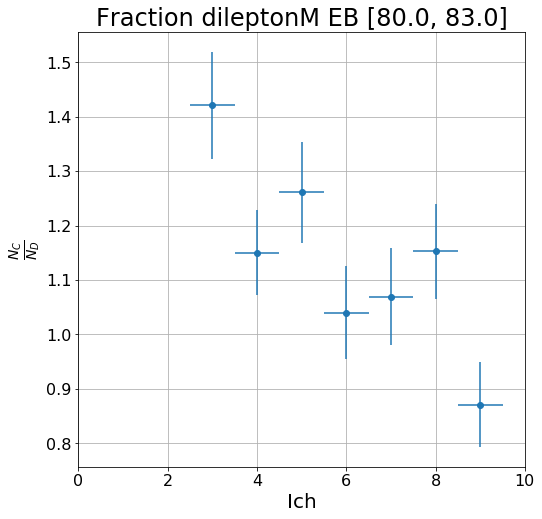

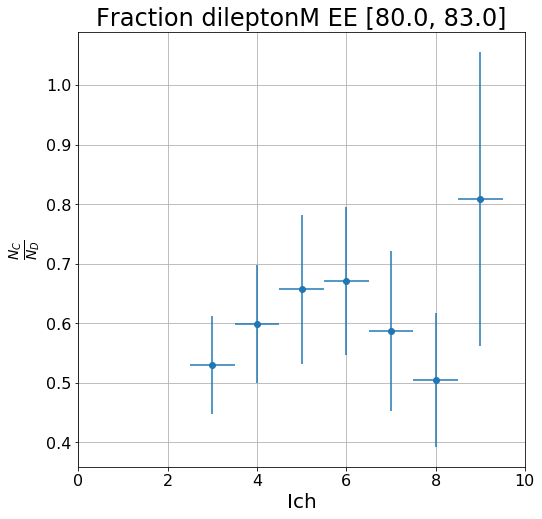

In [222]:
PlotIch(part,var,ph,
        Bins,
        frac=fracExtrapol, fracErr=fracExtrapolErr,
        ichRange=[ichLow,ichHigh],step=step,
        SingleVar = SingleVar, varTarget = varTarget,
       )

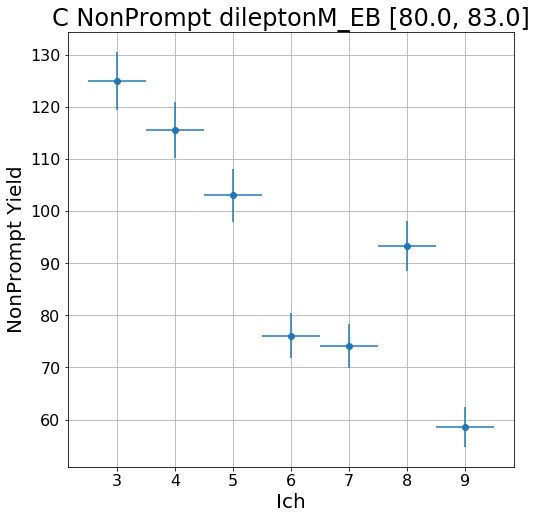

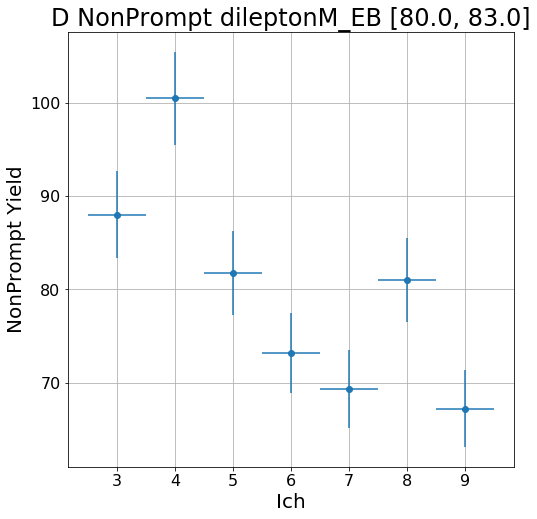

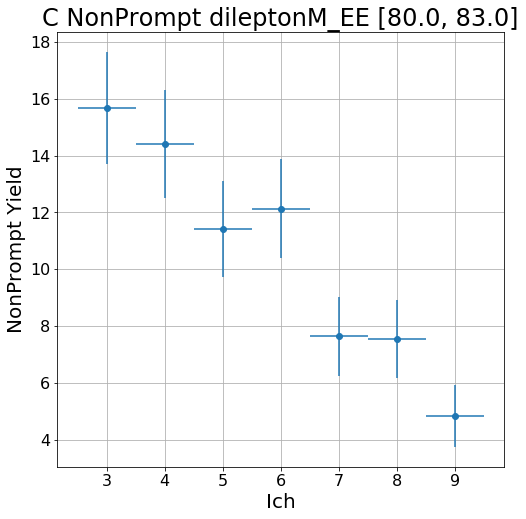

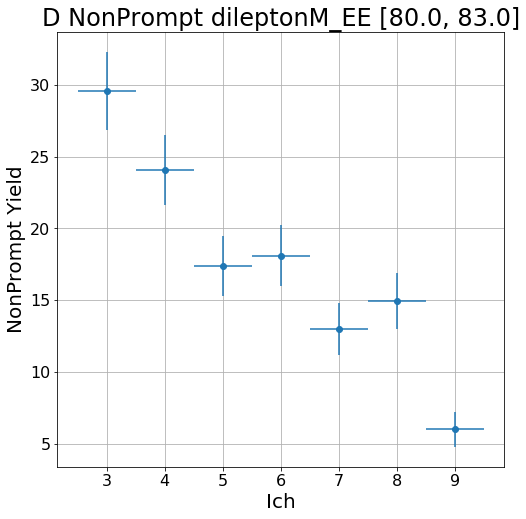

In [223]:
PlotIch_Prompt(part,var,ph,
               Bins = Bins, Yield= NonPromptYield,
               ichRange=[ichLow,ichHigh],step=step,
               SingleVar = SingleVar, varTarget=varTarget,
               NonPrompt = True,
               )

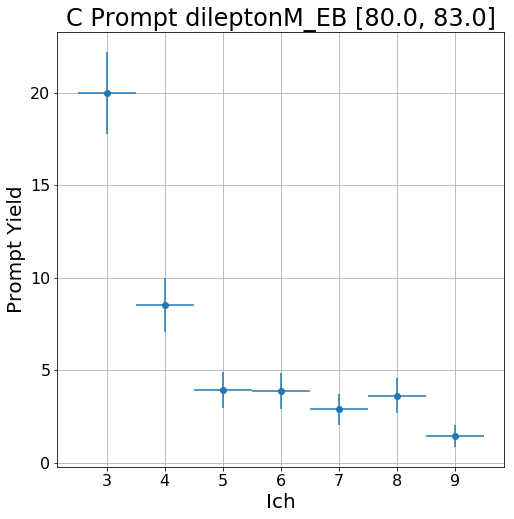

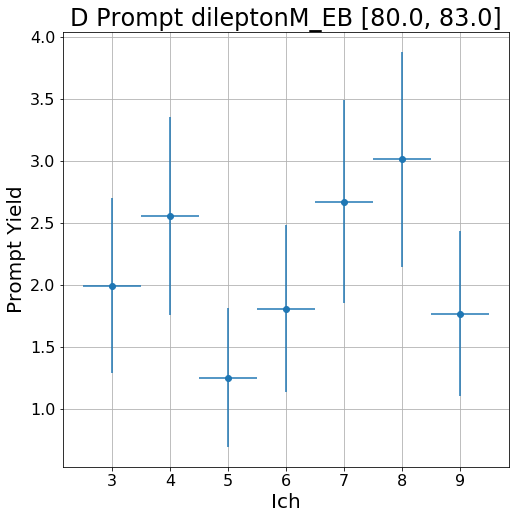

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


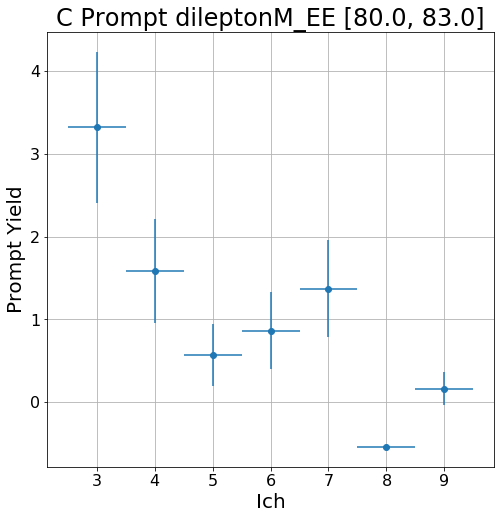

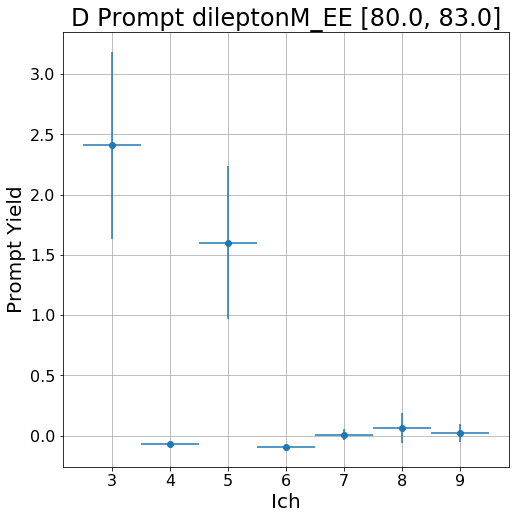

In [224]:
PlotIch_Prompt(part,var,ph,
               Bins = Bins, Yield= PromptYield,
               ichRange=[ichLow,ichHigh],step=step,
               SingleVar = SingleVar, varTarget=varTarget,
               NonPrompt = False,
               )

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


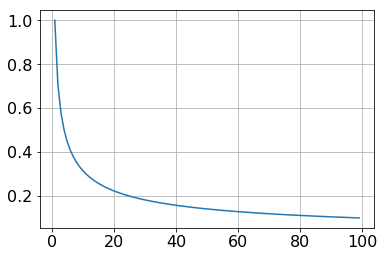

In [217]:
x = np.arange(0,100)
err = 1/np.sqrt(x)
plt.plot(x,err)

# Getting the fraction for the entire range, no varS bins

In [89]:
part = ''
var = ''
ph = ''

#SingleVar = False
SingleVar = True
varTarget = ''

In [90]:
fracExtrapol,fracExtrapolErr,PromptYield,NonPromptYield = GetABCDBkg_Extrapol(  part = part,var = var,ph = ph,
                                                                                Bins = Bins, Names = PromptNames,
                                                                                ichRange = [ichLow,ichHigh], step = step,
                                                                                SingleVar = SingleVar, varTarget = '',
                                                                                Print = Print,
                                                                               )

----  -----
[0, 1.4442]
----
[1.5666, 2.5]
----


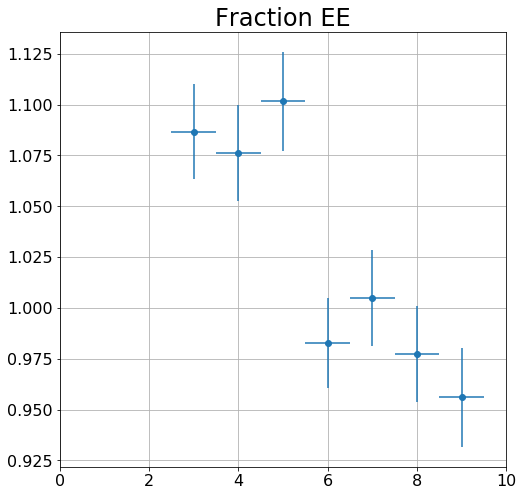

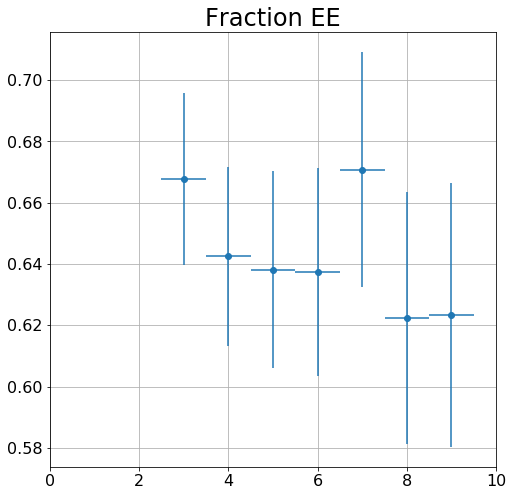

In [91]:
PlotIch(part = '',var = '',ph = '',
        Bins = Bins,
        frac=fracExtrapol, fracErr= fracExtrapolErr,
        ichRange=[ichLow,ichHigh],step=step,
        SingleVar = SingleVar, varTarget = varTarget,
       )

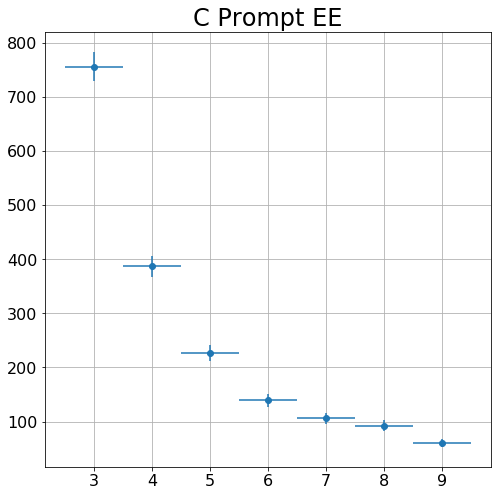

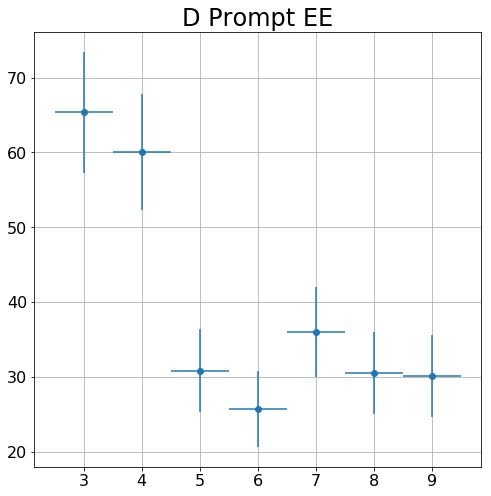

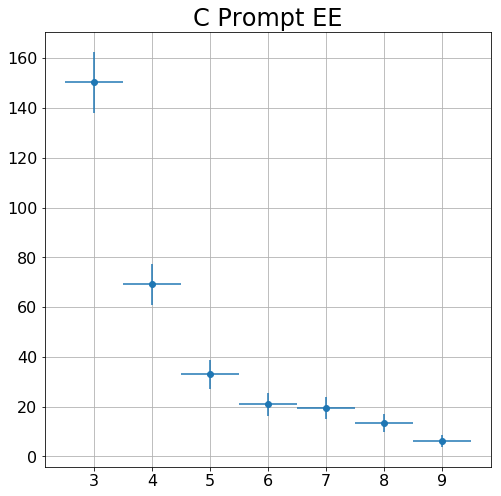

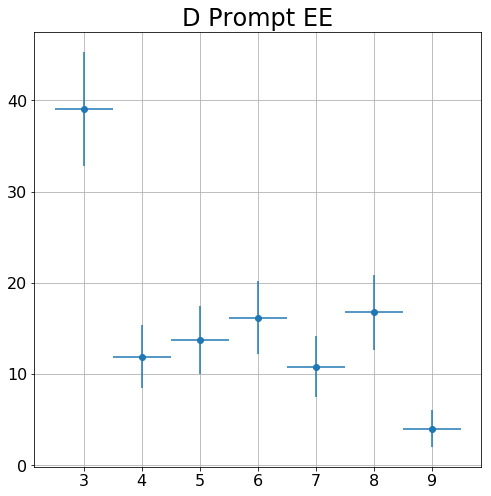

In [93]:
PlotIch_Prompt(part = '',var = '',ph = '',
               Bins = Bins, Yield= PromptYield,
               ichRange=[ichLow,ichHigh],step=step,
               SingleVar = SingleVar, varTarget = varTarget,
               )

# Lep-Photon M

# 2D Histograming 

In [47]:
def Hist2d(d,
           part1,var1,ph1,
           part2,var2,ph2,
           log,
           label = None,
          ):

    ranges,bins = {},{}

    if log:
        logScale = col.LogNorm()
    else:
        logScale = None

    ########
    d.ResetCuts()

    if ph1 == 'EE':
        d.AddCuts(np.logical_and(
                                np.array(d.df.photonOneEta) > 1.466,
                                np.array(d.df.photonOneEta) <= 2.5
                                )
                )
    elif ph1 == 'EB':
        d.AddCuts(
                np.array(d.df.photonOneEta) < 1.466
                )
    else:
        d.ResetCuts()


    x = d.GetWithCuts(part1+var1+'')
    #ranges[var1],bins[var1] = Help.GET_RangeBins(part=part1,var=var1,ph='')
    ranges[var1] = [0.2,6.2]
    bins[var1] = np.arange(0.2,6,step=0.2)

    ##############################
    d.ResetCuts()

    if ph2 == 'EE':
        d.AddCuts(np.logical_and(
                                np.array(d.df.photonOneEta) > 1.466,
                                np.array(d.df.photonOneEta) <= 2.5
                                )
                )
    elif ph2 == 'EB':
        d.AddCuts(
                np.array(d.df.photonOneEta) < 1.466
                )
    else:
        d.ResetCuts()

    y = d.GetWithCuts(part2+var2+'')
    ranges[var2],bins[var2] = Help.GET_RangeBins(part=part2,var=var2,ph='')

    ##############################

    wei = d.GetWithCuts('weight')

    ##############################

    print('Corr:\n',np.corrcoef(x,y))
    fig = plt.figure(figsize=(10,8))
    plt.hist2d(x,y,
               bins    = [  bins[var1],  bins[var2]],
               range   = [ranges[var1],ranges[var2]],
               weights = wei,
               norm = logScale,
                );
    plt.title(label)
    plt.colorbar()
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    

Corr:
 [[nan nan]
 [nan nan]]


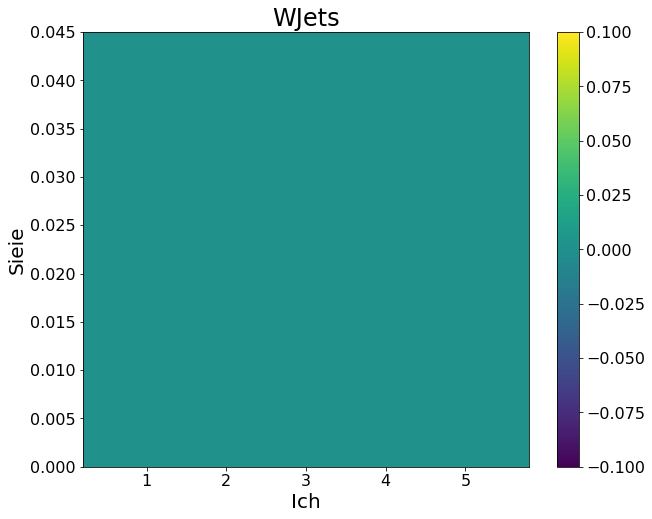

Corr:
 [[ 1.         -0.08533627]
 [-0.08533627  1.        ]]


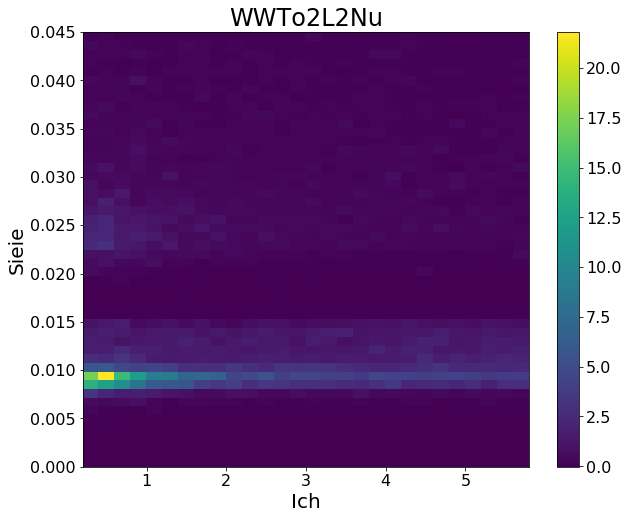

Corr:
 [[ 1.         -0.09241644]
 [-0.09241644  1.        ]]


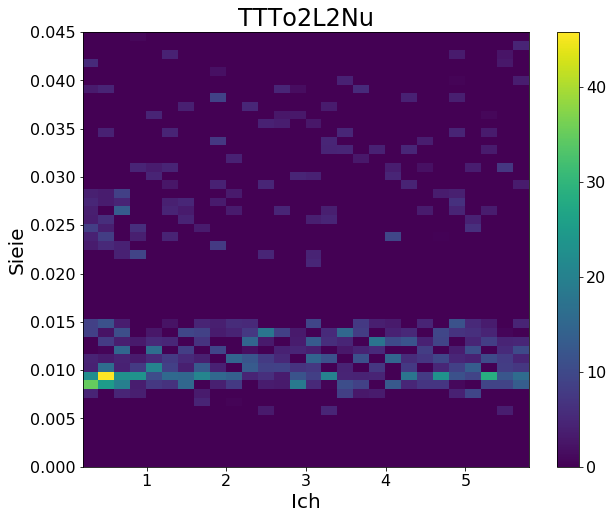

Corr:
 [[ 1.         -0.15896864]
 [-0.15896864  1.        ]]


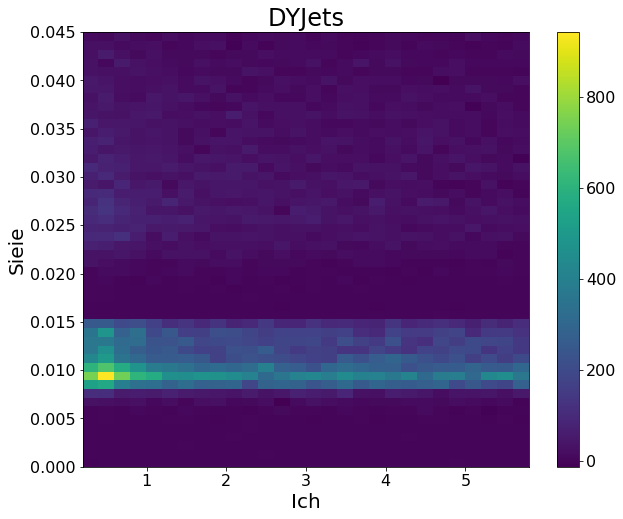

Corr:
 [[ 1.         -0.00442715]
 [-0.00442715  1.        ]]


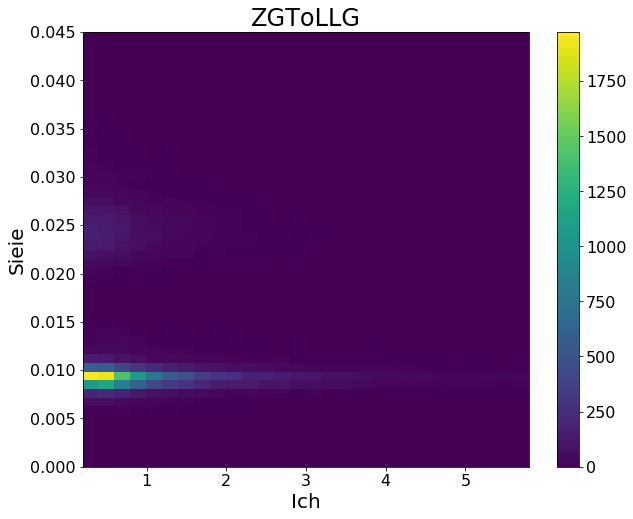

In [49]:
#log = True
log = False

##########################

part1 = 'photonOne'
var1 = 'Ich'
ph1 = ''
#ph1 = 'EB'
#ph1 = 'EE'

##########################
#part2 = 'dilepton'
#var2 = 'M'

part2 = 'photonOne'
var2 = 'Sieie'
ph2 = ''
#ph2 = 'EB'
#ph2 = 'EE'
##########################

#for i in range(len(data[''][:-1])):
for i in range(len(data[''][:-1])):

    Cut.PhaseSpace(data = data[''],
                   Region='IPFS',
                  )
    Hist2d(d=data[''][i],
            part1 = part1,var1 = var1,ph1 = ph1,
            part2 = part2,var2 = var2,ph2 = ph2,
            log   = log,
            label = Names[i],
            )
